# Concrete compressive strength Prediction

#### Data Set Information:
- Number of instances 1030 Number of Attributes 9
- Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable Missing Attribute Values None 

#### Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa -- Output Variable

In this Concrete compressive strength is the target feature and all other 8 features are input features
#### Problem State
The main problem statement of this dataset is predicting the concrete compressive strength by testing various models and selecting best from those models

In [62]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_excel('Concrete_Data.xls')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
#shape of dataset
df.shape

(1030, 9)

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
# check null values
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
# describe dataset
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


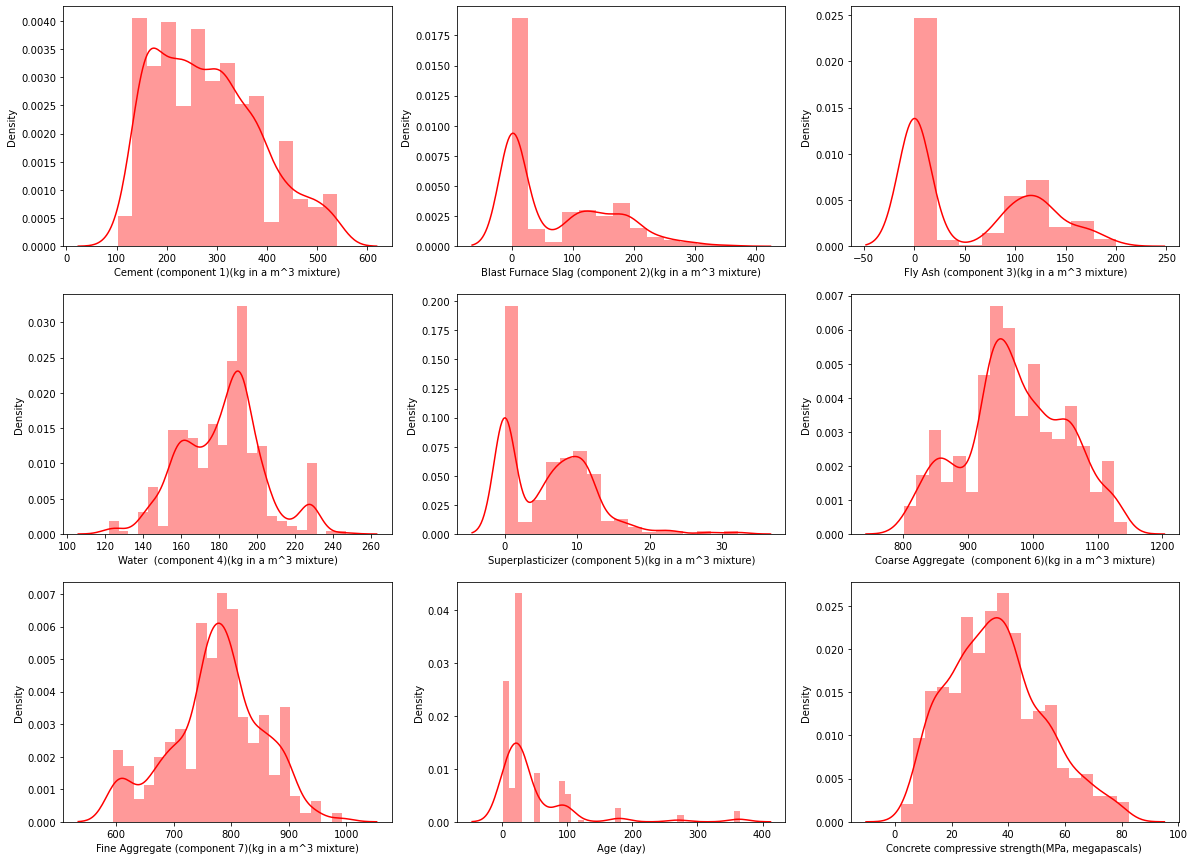

In [8]:
# distribution plot
plt.figure(figsize=(20,15))
col = df.columns
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.distplot(df[col[i]],color = 'red')

- Features like Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water  (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture), Coarse Aggregate  (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture), Age (day) are skewed rightly and have multimodals.
- The Cement (component 1)(kg in a m^3 mixture) is not normal and slightly skewed right
- Concrete compressive strength(MPa, megapascals) is distributed normally but slightly right skewed
- To convert all the features into normal there are multiple transformation techniques like Log Transformation,Square-Root Transformation,Reciprocal Transformation,Box-Cox Transformation,Yeo-Johnson Transformation by applying this technique the features can be converted into normal

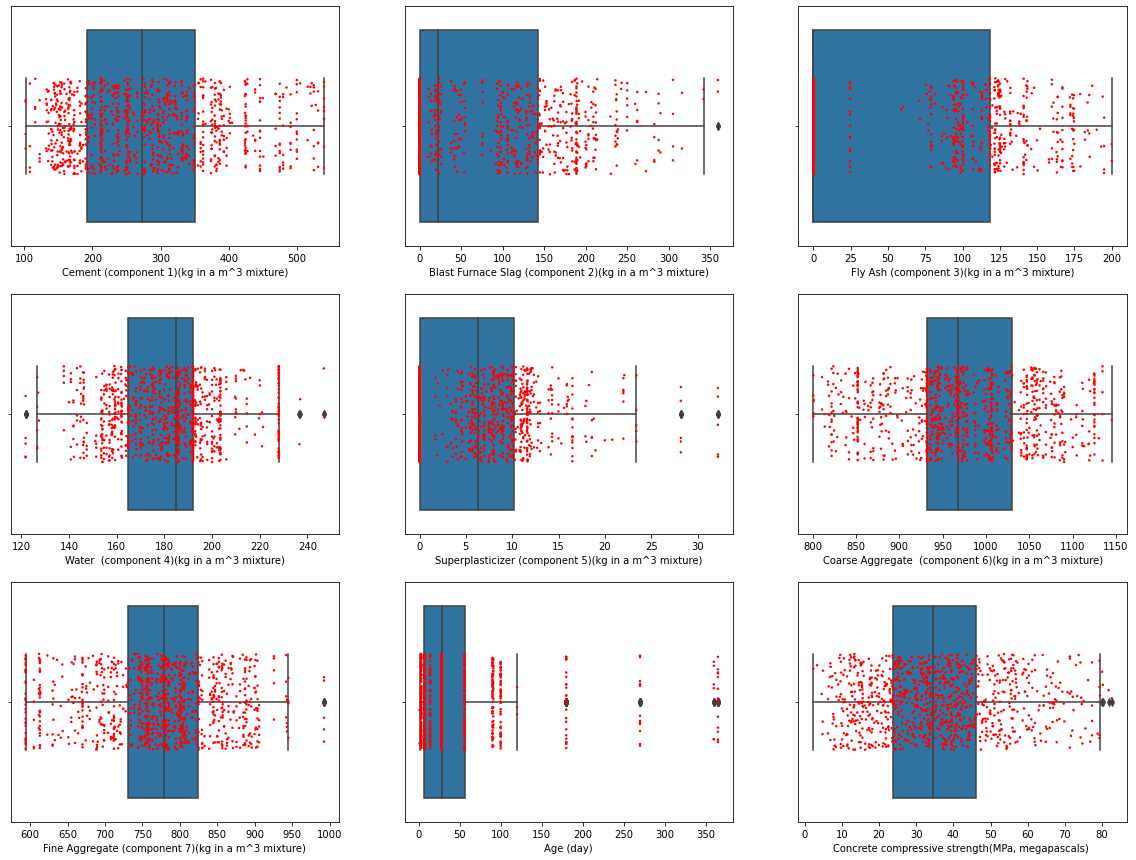

In [9]:
# box plot
plt.figure(figsize=(20,15))
col = df.columns
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col[i]])
    sns.stripplot(df[col[i]],color = 'red', jitter=0.2, size=2.5)

- The box plot is used to check distribution,skewness,iqr,25th percentile,75th percentile,median(50th percentile),upper value,lower value and outliers 
- There are outliers in Blast Furnace Slag (component 2)(kg in a m^3 mixture),Water  (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day) 

In [10]:
df[df['Age (day)'] > 150].sort_values('Age (day)').head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
823,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.585415
58,304.0,76.0,0.0,228.0,0.0,932.0,670.0,180,50.948829
51,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.931942
50,332.5,142.5,0.0,228.0,0.0,932.0,594.0,180,39.779318
47,380.0,95.0,0.0,228.0,0.0,932.0,594.0,180,40.759063


In [11]:
df[df['Age (day)'] > 150].sort_values('Age (day)').tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
620,254.0,0.0,0.0,198.0,0.0,968.0,863.0,365,29.785363
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
34,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365,53.692254
604,339.0,0.0,0.0,197.0,0.0,968.0,781.0,365,38.893341
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.908320


In [12]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

<AxesSubplot:xlabel='Age (day)', ylabel='Concrete compressive strength(MPa, megapascals) '>

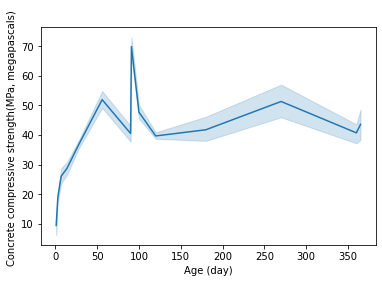

In [167]:
# check relation between age and compressive strength
sns.lineplot(x = 'Age (day)',y ='Concrete compressive strength(MPa, megapascals) ',data = df)

- As per studies and researches, the compressive strength of the concrete will increase with age, same in this data upto some point.
- There is positive relationship between age and concrete compressive strength, there is sudden increase in the strength at age 100 days(due to high density ) after that there is no increase in the strength.


<AxesSubplot:>

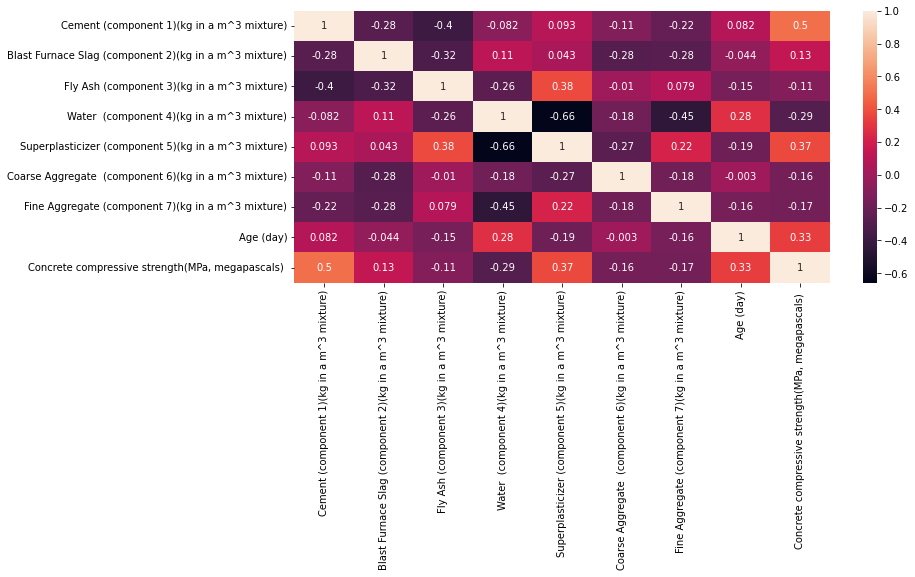

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

- from the above heat map we can see that there is high coorealtion betwen cement and concrete compressive strength,age and concrete compressive strength,water and concrete compressive strength and weak negative coorelation between water and compressive strength.
- There is also multi collinearty between fly ash and cement,fly ash and blast furnance,water and superplasticizer,water and fine aggregrate,fly ash and superplasticizer.
- we can remove the multicollinearty by removing the features which having high correlation with other input variables and we can also use Variance Inflation Factor(VIF) to remove multicollinearty

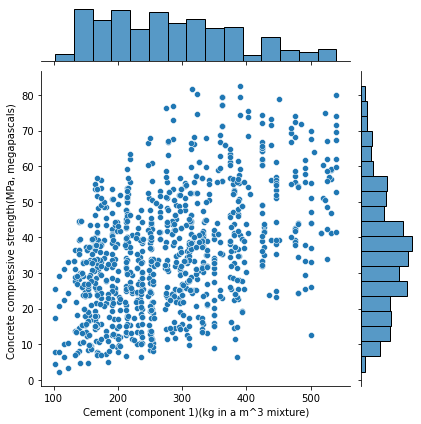

In [15]:
sns.jointplot(data=df, x = 'Cement (component 1)(kg in a m^3 mixture)',y ='Concrete compressive strength(MPa, megapascals) ')


- concrete compressive strength and cement having high correlation which is positve and having high density at 20-40 of concrete compressive strength and 100 - 300 of cement.

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

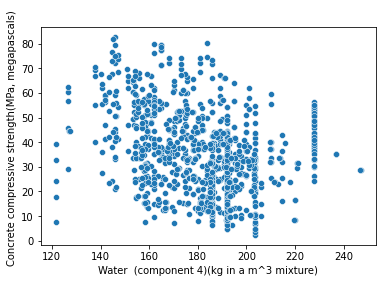

In [16]:
sns.scatterplot(data = df,x = 'Water  (component 4)(kg in a m^3 mixture)',y = 'Concrete compressive strength(MPa, megapascals) ')

- Water and concrete compressive strength having negative correlation which is weak 

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)', ylabel='Superplasticizer (component 5)(kg in a m^3 mixture)'>

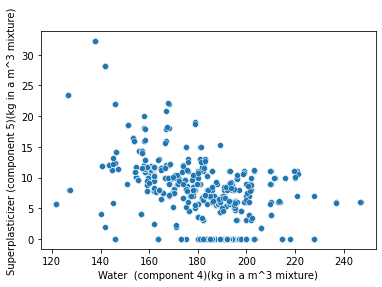

In [17]:
sns.scatterplot(data = df,x = 'Water  (component 4)(kg in a m^3 mixture)',y = 'Superplasticizer (component 5)(kg in a m^3 mixture)')

- This is the multicolinearity between water and superplasticizer which is negative and strong

In [18]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [19]:
df_temp = df.copy()

In [20]:
df_temp.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

### Removing Outliers 

 Removing outliers using Inter Quartile Range method
- In this the value which are above the upper limit i.e (Q3 + 1.5 IQR) or below the lower limit i.e (Q1-1.5IQR) considered as outliers,
- Where IQR = Q3-Q1,
- Q1 is 25th percentile of data , Q3 is 75th percentile of data and Q2 is 50th percentile of data also called median.

In [21]:
# Blast Furnace Slag (component 2)(kg in a m^3 mixture)
v = 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'
Q1 = np.percentile(df_temp[v] , 25)
Q3 = np.percentile(df_temp[v] , 75)

Q1,Q3 = np.percentile(df_temp[v] , [25,75])

IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

    # Find outliers
outliers = df_temp[(df_temp[v] > ul) | (df_temp[v] < ll)]
ind = list(outliers[v].index)
df_temp = df_temp.drop(ind)

print('outliers: ',outliers[v].values)
print('outliers_index: ',ind)
    


outliers:  [359.4 359.4]
outliers_index:  [553, 559]


In [22]:
# Water  (component 4)(kg in a m^3 mixture)
v = 'Water  (component 4)(kg in a m^3 mixture)'
Q1 = np.percentile(df_temp[v] , 25)
Q3 = np.percentile(df_temp[v] , 75)

Q1,Q3 = np.percentile(df_temp[v] , [25,75])

IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

    # Find outliers
outliers = df_temp[(df_temp[v] > ul) | (df_temp[v] < ll)]
ind = list(outliers[v].index)
df_temp = df_temp.drop(ind)

print('outliers: ',outliers[v].values)
print('outliers_index: ',ind)

outliers:  [121.75 121.75 121.75 121.75 121.75 237.   247.   246.9  236.7 ]
outliers_index:  [224, 225, 226, 227, 228, 862, 873, 936, 1019]


In [23]:
# Superplasticizer (component 5)(kg in a m^3 mixture)
v = 'Superplasticizer (component 5)(kg in a m^3 mixture)'
Q1 = np.percentile(df_temp[v] , 25)
Q3 = np.percentile(df_temp[v] , 75)

Q1,Q3 = np.percentile(df_temp[v] , [25,75])

IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

    # Find outliers
outliers = df_temp[(df_temp[v] > ul) | (df_temp[v] < ll)]
ind = list(outliers[v].index)
df_temp = df_temp.drop(ind)

print('outliers: ',outliers[v].values)
print('outliers_index: ',ind)

outliers:  [32.2 28.2 32.2 28.2 32.2 28.2 32.2 28.2 32.2 28.2]
outliers_index:  [76, 79, 99, 102, 122, 125, 145, 148, 168, 171]


In [24]:
# Fine Aggregate (component 7)(kg in a m^3 mixture)
v = 'Fine Aggregate (component 7)(kg in a m^3 mixture)'
Q1 = np.percentile(df_temp[v] , 25)
Q3 = np.percentile(df_temp[v] , 75)

Q1,Q3 = np.percentile(df_temp[v] , [25,75])

IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

    # Find outliers
outliers = df_temp[(df_temp[v] > ul) | (df_temp[v] < ll)]
ind = list(outliers[v].index)
df_temp = df_temp.drop(ind)

print('outliers: ',outliers[v].values)
print('outliers_index: ',ind)

outliers:  [594.  594.  594.  594.  594.  594.  594.  594.  594.  594.  594.  594.
 594.  594.  594.  594.  594.  594.  594.  594.  594.  594.  594.  594.
 594.  594.  594.  594.  594.  594.  992.6 992.6 992.6 992.6 992.6]
outliers_index:  [2, 3, 6, 7, 9, 12, 18, 19, 20, 26, 28, 29, 33, 35, 36, 37, 38, 39, 41, 42, 44, 45, 47, 48, 49, 50, 52, 56, 59, 67, 74, 97, 120, 143, 166]


In [25]:
df_temp.shape

(974, 9)

### Data Preprocessing

In [26]:
y = df_temp['Concrete compressive strength(MPa, megapascals) ']
X = df_temp.drop('Concrete compressive strength(MPa, megapascals) ',1)

In [27]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [28]:
# using minmax scalar for standardization
X_train_stand = MinMaxScaler(feature_range=(0,1)).fit_transform(X_train)
X_train_stand

array([[3.37899543e-01, 0.00000000e+00, 4.90717949e-01, ...,
        4.67626763e-01, 7.53441176e-01, 1.51098901e-01],
       [3.05936073e-01, 0.00000000e+00, 0.00000000e+00, ...,
        5.01050105e-01, 8.23529412e-01, 3.57142857e-02],
       [3.41027397e-01, 0.00000000e+00, 6.06512821e-01, ...,
        6.82268227e-01, 4.49205882e-01, 3.57142857e-02],
       ...,
       [1.43835616e-01, 5.84624379e-05, 7.36256410e-01, ...,
        6.13861386e-01, 8.70294118e-01, 7.41758242e-02],
       [3.37899543e-01, 0.00000000e+00, 4.90717949e-01, ...,
        4.43744374e-01, 7.41764706e-01, 5.49450549e-03],
       [6.40410959e-01, 0.00000000e+00, 0.00000000e+00, ...,
        7.40474047e-01, 3.95000000e-01, 1.64835165e-02]])

In [29]:
X_train_stand = pd.DataFrame(X_train_stand,columns=X_train.columns)
X_train_stand.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,0.337900,0.000000,0.490718,0.597021,0.250226,0.467627,0.753441,0.151099
1,0.305936,0.000000,0.000000,0.662363,0.000000,0.501050,0.823529,0.035714
2,0.341027,0.000000,0.606513,0.607249,0.287330,0.682268,0.449206,0.035714
3,0.292169,0.000000,0.606718,0.676961,0.209502,0.685269,0.451735,0.074176
4,0.424658,0.561239,0.000000,0.642502,0.000000,0.393039,0.331765,0.074176


In [30]:
X_test_stand = MinMaxScaler(feature_range=(0,1)).fit_transform(X_test)
X_test_stand

array([[0.19082696, 0.        , 0.62668666, ..., 0.84011628, 0.58861284,
        0.07417582],
       [0.06184851, 0.34392401, 0.96451774, ..., 0.47674419, 0.11239278,
        0.07417582],
       [0.38105166, 0.34425156, 0.4087956 , ..., 0.2994186 , 0.22094055,
        0.07417582],
       ...,
       [0.47417188, 0.47494268, 0.        , ..., 0.19186047, 0.64773736,
        0.07417582],
       [0.17081306, 0.14808385, 0.60954523, ..., 0.75116279, 0.51952085,
        0.27197802],
       [0.27032662, 0.        , 0.        , ..., 0.90697674, 0.6743567 ,
        0.07417582]])

In [31]:
X_test_stand = pd.DataFrame(X_test_stand,columns=X_test.columns)
X_test_stand.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,0.190827,0.000000,0.626687,0.347921,0.353182,0.840116,0.588613,0.074176
1,0.061849,0.343924,0.964518,0.683168,0.272727,0.476744,0.112393,0.074176
2,0.381052,0.344252,0.408796,0.818812,0.409091,0.299419,0.220941,0.074176
3,0.439426,0.000000,0.534733,0.366337,0.590909,0.441860,0.529429,0.074176
4,0.485754,0.000000,0.629685,0.821782,0.272727,0.174419,0.390417,0.074176


In [32]:
print('shape of X_train: ',X_train_stand.shape)
print('shape of X_test: ',X_test_stand.shape)

shape of X_train:  (681, 8)
shape of X_test:  (293, 8)


### Model Selection

#### Linear Regression

In [33]:
regressor_lin = LinearRegression()
regressor_lin.fit(X_train_stand,y_train)

LinearRegression()

In [34]:
y_train_pred = regressor_lin.predict(X_train_stand)

In [35]:
y_test_pred = regressor_lin.predict(X_test_stand)

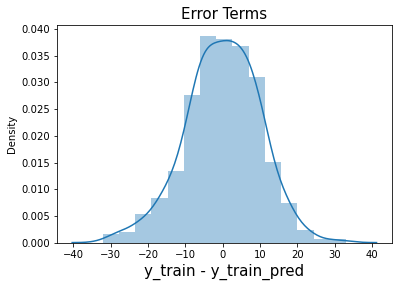

In [36]:
fig = plt.figure()
res = (y_train - y_train_pred)
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [37]:
# mean square error
mse_lr = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_lr)
print('RMSE: ',rmse_lr)

MSE:  103.85412985016862
RMSE:  10.190884645121278


In [38]:
 # r2 score for train data
r2_train_lr = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_lr)

train_r2_score:  0.6577271167281837


In [39]:
# r2 score for test data
r2_test_lr = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_lr)

test_r2_score:  0.6140825031881874


#### Ridge Regression

In [40]:
regressor_ridge = Ridge()
regressor_ridge.fit(X_train_stand,y_train)

Ridge()

In [41]:
y_train_pred = regressor_ridge.predict(X_train_stand)
y_test_pred = regressor_ridge.predict(X_test_stand)

In [42]:
print('*'*50)
# mean square error
mse_ridge = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_ridge)
print('RMSE: ',rmse_ridge)
print("*"*50)
# r2 score for train data
r2_train_ridge = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_ridge)
print('*'*50)
# r2 score for test data
r2_test_ridge = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_ridge)

**************************************************
MSE:  105.49334039780231
RMSE:  10.270995102608234
**************************************************
train_r2_score:  0.6552945150713018
**************************************************
test_r2_score:  0.6079912670264385


#### Lasso Regression

In [43]:
regressor_lasso = Lasso()
regressor_lasso.fit(X_train_stand,y_train)

Lasso()

In [44]:
y_train_pred = regressor_lasso.predict(X_train_stand)
y_test_pred = regressor_lasso.predict(X_test_stand)

In [45]:
print('*'*50)
# means square error
mse_lasso = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_lasso)
print('RMSE: ',rmse_lasso)
print("*"*50)
# r2 score for train data
r2_train_lasso = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_lasso)
print('*'*50)
# r2 score for test data
r2_test_lasso = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_lasso)

**************************************************
MSE:  205.3120628150368
RMSE:  14.32871462536109
**************************************************
train_r2_score:  0.2629304919980613
**************************************************
test_r2_score:  0.23706917133522165


#### Decision Tree

In [46]:
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train_stand,y_train)

DecisionTreeRegressor()

In [47]:
y_train_pred = regressor_dt.predict(X_train_stand)

In [48]:
y_test_pred = regressor_dt.predict(X_test_stand)

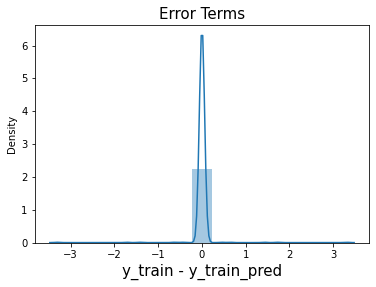

In [49]:
fig = plt.figure()
res = (y_train - y_train_pred)
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [50]:
# mean square eroor
mse_dt = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_dt)
print('RMSE: ',rmse_dt)

MSE:  53.64434687593385
RMSE:  7.324230121721589


In [51]:
# r2 score for train data
r2_train_dt = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_dt)

train_r2_score:  0.999833997049414


In [52]:
# r2 score for test data
r2_test_dt = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_dt)

test_r2_score:  0.800659905443025


#### Support Vector Machine

In [53]:
regressor_svm = SVR()

regressor_svm.fit(X_train_stand,y_train)

SVR()

In [54]:
# predict x_train
y_train_pred = regressor_svm.predict(X_train_stand)
#predict y_train
y_test_pred = regressor_svm.predict(X_test_stand)

In [55]:
print('*'*50)
# means square error
mse_svm = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_svm = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_svm)
print('RMSE: ',rmse_svm)
print("*"*50)
# r2 score for train data
r2_train_svm = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_svm)
print('*'*50)
# r2_score for test data
r2_test_svm = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_svm)

**************************************************
MSE:  125.35672357648492
RMSE:  11.196281685295567
**************************************************
train_r2_score:  0.6232278137225049
**************************************************
test_r2_score:  0.5341797861966406


### Random Forest

In [56]:
regressor_rf = RandomForestRegressor()

regressor_rf.fit(X_train_stand,y_train)

RandomForestRegressor()

In [57]:
# predict x_train
y_train_pred = regressor_rf.predict(X_train_stand)
#predict y_train
y_test_pred = regressor_rf.predict(X_test_stand)

In [58]:
print('*'*50)
# means square error
mse_rf = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_rf)
print('RMSE: ',rmse_rf)
print("*"*50)
# r2 score for train datat
r2_train_rf = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_rf)
print('*'*50)
# r2 score for test data 
r2_test_rf = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_rf)

**************************************************
MSE:  23.29666020569299
RMSE:  4.826661393312461
**************************************************
train_r2_score:  0.9853046968868796
**************************************************
test_r2_score:  0.9134306088392709


#### Xg Boost

In [59]:
regressor_xg = XGBRegressor()

regressor_xg.fit(X_train_stand,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [60]:
# predict x_train
y_train_pred = regressor_xg.predict(X_train_stand)
#predict y_train
y_test_pred = regressor_xg.predict(X_test_stand)

In [61]:
print('*'*50)
# mean square error
mse_xg = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_xg = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_xg)
print('RMSE: ',rmse_xg)
print("*"*50)
# r2_score for train data 
r2_train_xg = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_xg)
print('*'*50)
# r2 score for test data
r2_test_xg = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_xg)

**************************************************
MSE:  23.892098329016463
RMSE:  4.887954411511677
**************************************************
train_r2_score:  0.9992549128819188
**************************************************
test_r2_score:  0.9112179862850129


 from all the above models Random forest regressor and xg boost regressor giving better result based on root mean square error and r2 score, based on this score will do hyperparamter tunning to check is there any increment in the score and then will decide which is the best model for this use case.

### Hyper paramter Tunning

#### Random Forest 

In [67]:
# tuning n_estimators,max_depth,criterion
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
              'max_depth':[2,4,8,10,12,14,16,18],
              'criterion':["squared_error", "absolute_error", "poisson"]
              }

In [68]:
# grisearchcv with crossfold validation of 5
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv = 5 ,return_train_score=True,verbose=5)

In [69]:
grid.fit(X_train_stand,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END criterion=squared_error, max_depth=2, n_estimators=100;, score=(train=0.612, test=0.578) total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=2, n_estimators=100;, score=(train=0.592, test=0.594) total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=2, n_estimators=100;, score=(train=0.606, test=0.569) total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=2, n_estimators=100;, score=(train=0.604, test=0.563) total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=2, n_estimators=100;, score=(train=0.614, test=0.479) total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=2, n_estimators=200;, score=(train=0.621, test=0.579) total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=2, n_estimators=200;, score=(train=0.595, test=0.594) total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=2, n_estimators=200;, score=(train=0.613,

[CV 4/5] END criterion=squared_error, max_depth=4, n_estimators=400;, score=(train=0.842, test=0.784) total time=   0.9s
[CV 5/5] END criterion=squared_error, max_depth=4, n_estimators=400;, score=(train=0.831, test=0.674) total time=   0.8s
[CV 1/5] END criterion=squared_error, max_depth=4, n_estimators=500;, score=(train=0.835, test=0.787) total time=   1.1s
[CV 2/5] END criterion=squared_error, max_depth=4, n_estimators=500;, score=(train=0.828, test=0.804) total time=   1.1s
[CV 3/5] END criterion=squared_error, max_depth=4, n_estimators=500;, score=(train=0.844, test=0.787) total time=   1.1s
[CV 4/5] END criterion=squared_error, max_depth=4, n_estimators=500;, score=(train=0.839, test=0.783) total time=   1.1s
[CV 5/5] END criterion=squared_error, max_depth=4, n_estimators=500;, score=(train=0.835, test=0.683) total time=   1.1s
[CV 1/5] END criterion=squared_error, max_depth=4, n_estimators=600;, score=(train=0.836, test=0.785) total time=   1.3s
[CV 2/5] END criterion=squared_e

[CV 2/5] END criterion=squared_error, max_depth=8, n_estimators=800;, score=(train=0.968, test=0.900) total time=   2.5s
[CV 3/5] END criterion=squared_error, max_depth=8, n_estimators=800;, score=(train=0.971, test=0.876) total time=   2.4s
[CV 4/5] END criterion=squared_error, max_depth=8, n_estimators=800;, score=(train=0.972, test=0.879) total time=   2.5s
[CV 5/5] END criterion=squared_error, max_depth=8, n_estimators=800;, score=(train=0.967, test=0.836) total time=   2.5s
[CV 1/5] END criterion=squared_error, max_depth=8, n_estimators=900;, score=(train=0.968, test=0.886) total time=   2.8s
[CV 2/5] END criterion=squared_error, max_depth=8, n_estimators=900;, score=(train=0.969, test=0.901) total time=   2.8s
[CV 3/5] END criterion=squared_error, max_depth=8, n_estimators=900;, score=(train=0.971, test=0.873) total time=   2.9s
[CV 4/5] END criterion=squared_error, max_depth=8, n_estimators=900;, score=(train=0.973, test=0.880) total time=   2.9s
[CV 5/5] END criterion=squared_e

[CV 5/5] END criterion=squared_error, max_depth=12, n_estimators=100;, score=(train=0.983, test=0.848) total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=12, n_estimators=200;, score=(train=0.983, test=0.895) total time=   0.7s
[CV 2/5] END criterion=squared_error, max_depth=12, n_estimators=200;, score=(train=0.983, test=0.911) total time=   0.7s
[CV 3/5] END criterion=squared_error, max_depth=12, n_estimators=200;, score=(train=0.984, test=0.883) total time=   0.7s
[CV 4/5] END criterion=squared_error, max_depth=12, n_estimators=200;, score=(train=0.986, test=0.884) total time=   0.6s
[CV 5/5] END criterion=squared_error, max_depth=12, n_estimators=200;, score=(train=0.983, test=0.847) total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=12, n_estimators=300;, score=(train=0.983, test=0.898) total time=   1.0s
[CV 2/5] END criterion=squared_error, max_depth=12, n_estimators=300;, score=(train=0.984, test=0.911) total time=   1.0s
[CV 3/5] END criterion=s

[CV 3/5] END criterion=squared_error, max_depth=14, n_estimators=500;, score=(train=0.985, test=0.879) total time=   1.9s
[CV 4/5] END criterion=squared_error, max_depth=14, n_estimators=500;, score=(train=0.986, test=0.884) total time=   3.0s
[CV 5/5] END criterion=squared_error, max_depth=14, n_estimators=500;, score=(train=0.984, test=0.856) total time=   2.5s
[CV 1/5] END criterion=squared_error, max_depth=14, n_estimators=600;, score=(train=0.985, test=0.899) total time=   4.1s
[CV 2/5] END criterion=squared_error, max_depth=14, n_estimators=600;, score=(train=0.985, test=0.910) total time=   3.2s
[CV 3/5] END criterion=squared_error, max_depth=14, n_estimators=600;, score=(train=0.985, test=0.880) total time=   3.8s
[CV 4/5] END criterion=squared_error, max_depth=14, n_estimators=600;, score=(train=0.986, test=0.884) total time=   3.2s
[CV 5/5] END criterion=squared_error, max_depth=14, n_estimators=600;, score=(train=0.985, test=0.855) total time=   4.0s
[CV 1/5] END criterion=s

[CV 1/5] END criterion=squared_error, max_depth=16, n_estimators=900;, score=(train=0.985, test=0.898) total time=   4.7s
[CV 2/5] END criterion=squared_error, max_depth=16, n_estimators=900;, score=(train=0.985, test=0.910) total time=   4.7s
[CV 3/5] END criterion=squared_error, max_depth=16, n_estimators=900;, score=(train=0.985, test=0.881) total time=   4.7s
[CV 4/5] END criterion=squared_error, max_depth=16, n_estimators=900;, score=(train=0.986, test=0.884) total time=   4.7s
[CV 5/5] END criterion=squared_error, max_depth=16, n_estimators=900;, score=(train=0.985, test=0.853) total time=   4.8s
[CV 1/5] END criterion=squared_error, max_depth=16, n_estimators=1000;, score=(train=0.985, test=0.897) total time=   5.3s
[CV 2/5] END criterion=squared_error, max_depth=16, n_estimators=1000;, score=(train=0.985, test=0.910) total time=   5.3s
[CV 3/5] END criterion=squared_error, max_depth=16, n_estimators=1000;, score=(train=0.985, test=0.882) total time=   5.2s
[CV 4/5] END criterio

[CV 4/5] END criterion=absolute_error, max_depth=2, n_estimators=200;, score=(train=0.622, test=0.606) total time=   1.8s
[CV 5/5] END criterion=absolute_error, max_depth=2, n_estimators=200;, score=(train=0.604, test=0.450) total time=   1.7s
[CV 1/5] END criterion=absolute_error, max_depth=2, n_estimators=300;, score=(train=0.608, test=0.567) total time=   2.6s
[CV 2/5] END criterion=absolute_error, max_depth=2, n_estimators=300;, score=(train=0.574, test=0.604) total time=   2.7s
[CV 3/5] END criterion=absolute_error, max_depth=2, n_estimators=300;, score=(train=0.614, test=0.575) total time=   2.7s
[CV 4/5] END criterion=absolute_error, max_depth=2, n_estimators=300;, score=(train=0.617, test=0.599) total time=   2.7s
[CV 5/5] END criterion=absolute_error, max_depth=2, n_estimators=300;, score=(train=0.602, test=0.445) total time=   2.7s
[CV 1/5] END criterion=absolute_error, max_depth=2, n_estimators=400;, score=(train=0.612, test=0.559) total time=   3.5s
[CV 2/5] END criterion=a

[CV 2/5] END criterion=absolute_error, max_depth=4, n_estimators=600;, score=(train=0.814, test=0.792) total time=   8.1s
[CV 3/5] END criterion=absolute_error, max_depth=4, n_estimators=600;, score=(train=0.831, test=0.761) total time=   8.0s
[CV 4/5] END criterion=absolute_error, max_depth=4, n_estimators=600;, score=(train=0.831, test=0.788) total time=   8.1s
[CV 5/5] END criterion=absolute_error, max_depth=4, n_estimators=600;, score=(train=0.828, test=0.681) total time=   8.0s
[CV 1/5] END criterion=absolute_error, max_depth=4, n_estimators=700;, score=(train=0.825, test=0.771) total time=   9.3s
[CV 2/5] END criterion=absolute_error, max_depth=4, n_estimators=700;, score=(train=0.814, test=0.794) total time=   9.5s
[CV 3/5] END criterion=absolute_error, max_depth=4, n_estimators=700;, score=(train=0.831, test=0.760) total time=   9.3s
[CV 4/5] END criterion=absolute_error, max_depth=4, n_estimators=700;, score=(train=0.832, test=0.789) total time=   9.6s
[CV 5/5] END criterion=a

[CV 5/5] END criterion=absolute_error, max_depth=8, n_estimators=900;, score=(train=0.961, test=0.826) total time=  17.9s
[CV 1/5] END criterion=absolute_error, max_depth=8, n_estimators=1000;, score=(train=0.962, test=0.880) total time=  19.5s
[CV 2/5] END criterion=absolute_error, max_depth=8, n_estimators=1000;, score=(train=0.962, test=0.894) total time=  19.8s
[CV 3/5] END criterion=absolute_error, max_depth=8, n_estimators=1000;, score=(train=0.965, test=0.864) total time=  19.8s
[CV 4/5] END criterion=absolute_error, max_depth=8, n_estimators=1000;, score=(train=0.965, test=0.877) total time=  19.8s
[CV 5/5] END criterion=absolute_error, max_depth=8, n_estimators=1000;, score=(train=0.960, test=0.823) total time=  19.7s
[CV 1/5] END criterion=absolute_error, max_depth=10, n_estimators=100;, score=(train=0.975, test=0.890) total time=   2.0s
[CV 2/5] END criterion=absolute_error, max_depth=10, n_estimators=100;, score=(train=0.975, test=0.901) total time=   2.1s
[CV 3/5] END crit

[CV 2/5] END criterion=absolute_error, max_depth=12, n_estimators=300;, score=(train=0.982, test=0.909) total time=   7.0s
[CV 3/5] END criterion=absolute_error, max_depth=12, n_estimators=300;, score=(train=0.983, test=0.874) total time=   6.9s
[CV 4/5] END criterion=absolute_error, max_depth=12, n_estimators=300;, score=(train=0.983, test=0.889) total time=   7.1s
[CV 5/5] END criterion=absolute_error, max_depth=12, n_estimators=300;, score=(train=0.981, test=0.851) total time=   6.7s
[CV 1/5] END criterion=absolute_error, max_depth=12, n_estimators=400;, score=(train=0.981, test=0.893) total time=   9.0s
[CV 2/5] END criterion=absolute_error, max_depth=12, n_estimators=400;, score=(train=0.982, test=0.909) total time=   9.2s
[CV 3/5] END criterion=absolute_error, max_depth=12, n_estimators=400;, score=(train=0.983, test=0.872) total time=   9.0s
[CV 4/5] END criterion=absolute_error, max_depth=12, n_estimators=400;, score=(train=0.983, test=0.886) total time=   9.3s
[CV 5/5] END cri

[CV 4/5] END criterion=absolute_error, max_depth=14, n_estimators=600;, score=(train=0.985, test=0.885) total time=  14.4s
[CV 5/5] END criterion=absolute_error, max_depth=14, n_estimators=600;, score=(train=0.983, test=0.850) total time=  14.4s
[CV 1/5] END criterion=absolute_error, max_depth=14, n_estimators=700;, score=(train=0.983, test=0.896) total time=  16.7s
[CV 2/5] END criterion=absolute_error, max_depth=14, n_estimators=700;, score=(train=0.983, test=0.910) total time=  17.0s
[CV 3/5] END criterion=absolute_error, max_depth=14, n_estimators=700;, score=(train=0.984, test=0.879) total time=  16.7s
[CV 4/5] END criterion=absolute_error, max_depth=14, n_estimators=700;, score=(train=0.985, test=0.887) total time=  16.9s
[CV 5/5] END criterion=absolute_error, max_depth=14, n_estimators=700;, score=(train=0.983, test=0.846) total time=  14.4s
[CV 1/5] END criterion=absolute_error, max_depth=14, n_estimators=800;, score=(train=0.983, test=0.897) total time=  13.6s
[CV 2/5] END cri

[CV 1/5] END criterion=absolute_error, max_depth=16, n_estimators=1000;, score=(train=0.984, test=0.897) total time=  17.0s
[CV 2/5] END criterion=absolute_error, max_depth=16, n_estimators=1000;, score=(train=0.984, test=0.910) total time=  18.2s
[CV 3/5] END criterion=absolute_error, max_depth=16, n_estimators=1000;, score=(train=0.984, test=0.876) total time=  17.1s
[CV 4/5] END criterion=absolute_error, max_depth=16, n_estimators=1000;, score=(train=0.985, test=0.887) total time=  17.3s
[CV 5/5] END criterion=absolute_error, max_depth=16, n_estimators=1000;, score=(train=0.984, test=0.848) total time=  17.4s
[CV 1/5] END criterion=absolute_error, max_depth=18, n_estimators=100;, score=(train=0.983, test=0.892) total time=   1.7s
[CV 2/5] END criterion=absolute_error, max_depth=18, n_estimators=100;, score=(train=0.984, test=0.911) total time=   1.7s
[CV 3/5] END criterion=absolute_error, max_depth=18, n_estimators=100;, score=(train=0.984, test=0.872) total time=   1.6s
[CV 4/5] EN

[CV 4/5] END criterion=poisson, max_depth=2, n_estimators=300;, score=(train=0.596, test=0.544) total time=   0.6s
[CV 5/5] END criterion=poisson, max_depth=2, n_estimators=300;, score=(train=0.600, test=0.442) total time=   0.6s
[CV 1/5] END criterion=poisson, max_depth=2, n_estimators=400;, score=(train=0.598, test=0.578) total time=   0.8s
[CV 2/5] END criterion=poisson, max_depth=2, n_estimators=400;, score=(train=0.576, test=0.577) total time=   0.8s
[CV 3/5] END criterion=poisson, max_depth=2, n_estimators=400;, score=(train=0.588, test=0.558) total time=   0.8s
[CV 4/5] END criterion=poisson, max_depth=2, n_estimators=400;, score=(train=0.585, test=0.538) total time=   0.8s
[CV 5/5] END criterion=poisson, max_depth=2, n_estimators=400;, score=(train=0.604, test=0.447) total time=   0.8s
[CV 1/5] END criterion=poisson, max_depth=2, n_estimators=500;, score=(train=0.598, test=0.572) total time=   1.0s
[CV 2/5] END criterion=poisson, max_depth=2, n_estimators=500;, score=(train=0.5

[CV 1/5] END criterion=poisson, max_depth=4, n_estimators=800;, score=(train=0.834, test=0.787) total time=   2.1s
[CV 2/5] END criterion=poisson, max_depth=4, n_estimators=800;, score=(train=0.820, test=0.793) total time=   2.2s
[CV 3/5] END criterion=poisson, max_depth=4, n_estimators=800;, score=(train=0.838, test=0.785) total time=   2.1s
[CV 4/5] END criterion=poisson, max_depth=4, n_estimators=800;, score=(train=0.839, test=0.787) total time=   2.1s
[CV 5/5] END criterion=poisson, max_depth=4, n_estimators=800;, score=(train=0.833, test=0.674) total time=   2.2s
[CV 1/5] END criterion=poisson, max_depth=4, n_estimators=900;, score=(train=0.833, test=0.781) total time=   2.4s
[CV 2/5] END criterion=poisson, max_depth=4, n_estimators=900;, score=(train=0.820, test=0.794) total time=   2.5s
[CV 3/5] END criterion=poisson, max_depth=4, n_estimators=900;, score=(train=0.840, test=0.785) total time=   2.4s
[CV 4/5] END criterion=poisson, max_depth=4, n_estimators=900;, score=(train=0.8

[CV 3/5] END criterion=poisson, max_depth=10, n_estimators=200;, score=(train=0.982, test=0.885) total time=   0.8s
[CV 4/5] END criterion=poisson, max_depth=10, n_estimators=200;, score=(train=0.982, test=0.886) total time=   0.8s
[CV 5/5] END criterion=poisson, max_depth=10, n_estimators=200;, score=(train=0.979, test=0.849) total time=   0.8s
[CV 1/5] END criterion=poisson, max_depth=10, n_estimators=300;, score=(train=0.980, test=0.889) total time=   1.2s
[CV 2/5] END criterion=poisson, max_depth=10, n_estimators=300;, score=(train=0.980, test=0.906) total time=   1.2s
[CV 3/5] END criterion=poisson, max_depth=10, n_estimators=300;, score=(train=0.981, test=0.888) total time=   1.2s
[CV 4/5] END criterion=poisson, max_depth=10, n_estimators=300;, score=(train=0.983, test=0.887) total time=   1.3s
[CV 5/5] END criterion=poisson, max_depth=10, n_estimators=300;, score=(train=0.979, test=0.851) total time=   1.2s
[CV 1/5] END criterion=poisson, max_depth=10, n_estimators=400;, score=(

[CV 4/5] END criterion=poisson, max_depth=12, n_estimators=600;, score=(train=0.986, test=0.885) total time=   2.7s
[CV 5/5] END criterion=poisson, max_depth=12, n_estimators=600;, score=(train=0.984, test=0.859) total time=   2.7s
[CV 1/5] END criterion=poisson, max_depth=12, n_estimators=700;, score=(train=0.984, test=0.892) total time=   3.2s
[CV 2/5] END criterion=poisson, max_depth=12, n_estimators=700;, score=(train=0.984, test=0.910) total time=   3.2s
[CV 3/5] END criterion=poisson, max_depth=12, n_estimators=700;, score=(train=0.984, test=0.885) total time=   3.2s
[CV 4/5] END criterion=poisson, max_depth=12, n_estimators=700;, score=(train=0.985, test=0.889) total time=   3.2s
[CV 5/5] END criterion=poisson, max_depth=12, n_estimators=700;, score=(train=0.983, test=0.853) total time=   3.2s
[CV 1/5] END criterion=poisson, max_depth=12, n_estimators=800;, score=(train=0.984, test=0.892) total time=   3.6s
[CV 2/5] END criterion=poisson, max_depth=12, n_estimators=800;, score=(

[CV 5/5] END criterion=poisson, max_depth=14, n_estimators=1000;, score=(train=0.984, test=0.855) total time=   4.7s
[CV 1/5] END criterion=poisson, max_depth=16, n_estimators=100;, score=(train=0.984, test=0.888) total time=   0.4s
[CV 2/5] END criterion=poisson, max_depth=16, n_estimators=100;, score=(train=0.984, test=0.908) total time=   0.4s
[CV 3/5] END criterion=poisson, max_depth=16, n_estimators=100;, score=(train=0.983, test=0.878) total time=   0.4s
[CV 4/5] END criterion=poisson, max_depth=16, n_estimators=100;, score=(train=0.986, test=0.884) total time=   0.4s
[CV 5/5] END criterion=poisson, max_depth=16, n_estimators=100;, score=(train=0.984, test=0.860) total time=   0.4s
[CV 1/5] END criterion=poisson, max_depth=16, n_estimators=200;, score=(train=0.984, test=0.892) total time=   0.9s
[CV 2/5] END criterion=poisson, max_depth=16, n_estimators=200;, score=(train=0.985, test=0.911) total time=   0.9s
[CV 3/5] END criterion=poisson, max_depth=16, n_estimators=200;, score=

[CV 1/5] END criterion=poisson, max_depth=18, n_estimators=500;, score=(train=0.985, test=0.894) total time=   2.2s
[CV 2/5] END criterion=poisson, max_depth=18, n_estimators=500;, score=(train=0.984, test=0.910) total time=   2.3s
[CV 3/5] END criterion=poisson, max_depth=18, n_estimators=500;, score=(train=0.985, test=0.888) total time=   2.2s
[CV 4/5] END criterion=poisson, max_depth=18, n_estimators=500;, score=(train=0.986, test=0.886) total time=   2.3s
[CV 5/5] END criterion=poisson, max_depth=18, n_estimators=500;, score=(train=0.985, test=0.853) total time=   2.3s
[CV 1/5] END criterion=poisson, max_depth=18, n_estimators=600;, score=(train=0.985, test=0.894) total time=   3.6s
[CV 2/5] END criterion=poisson, max_depth=18, n_estimators=600;, score=(train=0.984, test=0.910) total time=   3.7s
[CV 3/5] END criterion=poisson, max_depth=18, n_estimators=600;, score=(train=0.985, test=0.886) total time=   3.8s
[CV 4/5] END criterion=poisson, max_depth=18, n_estimators=600;, score=(

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 4, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             return_train_score=True, verbose=5)

In [70]:
# best estimator
grid.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=18)

In [71]:
# best params
grid.best_params_

{'criterion': 'poisson', 'max_depth': 18, 'n_estimators': 100}

In [82]:
df_results_hp = pd.DataFrame(grid.cv_results_)

In [83]:
df_results_hp.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.225391,0.025289,0.016348,0.003333,squared_error,2,100,"{'criterion': 'squared_error', 'max_depth': 2,...",0.577979,0.593833,...,0.556660,0.040223,223,0.612445,0.591609,0.605618,0.604175,0.614155,0.605600,0.007973
1,0.426102,0.021383,0.026345,0.004412,squared_error,2,200,"{'criterion': 'squared_error', 'max_depth': 2,...",0.578837,0.593655,...,0.556556,0.047325,225,0.621347,0.594858,0.612737,0.602738,0.608586,0.608053,0.008959
2,0.566952,0.011200,0.037300,0.002502,squared_error,2,300,"{'criterion': 'squared_error', 'max_depth': 2,...",0.577274,0.592799,...,0.556626,0.047284,224,0.618436,0.590855,0.614436,0.607195,0.609596,0.608103,0.009460
3,0.753955,0.005506,0.047601,0.003480,squared_error,2,400,"{'criterion': 'squared_error', 'max_depth': 2,...",0.577776,0.588839,...,0.558112,0.041985,216,0.622470,0.590104,0.617473,0.606229,0.616177,0.610491,0.011475
4,0.953790,0.028657,0.060854,0.005198,squared_error,2,500,"{'criterion': 'squared_error', 'max_depth': 2,...",0.582754,0.595654,...,0.560839,0.043814,212,0.623066,0.596681,0.613707,0.609260,0.612937,0.611130,0.008540


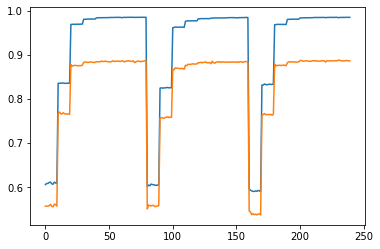

In [85]:
plt.plot(df_results_hp['mean_train_score'])
plt.plot(df_results_hp['mean_test_score'])

In [78]:
y_test_pred = grid.predict(X_test_stand)

In [79]:
y_train_pred = grid.predict(X_train_stand)

In [80]:
print('*'*50)
# mean square error
mse_rf_hp = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_rf_hp = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_rf_hp)
print('RMSE: ',rmse_rf_hp)
print("*"*50)
# r2 score for train data
r2_train_rf_hp = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_rf_hp)
print('*'*50)
# r2 score for test data
r2_test_rf_hp = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_rf_hp)

**************************************************
MSE:  22.809450825463475
RMSE:  4.775924080789337
**************************************************
train_r2_score:  0.9856531570127488
**************************************************
test_r2_score:  0.9152410580213368


#### Xg boost

In [86]:
# tuning n_estimators,max_depth,learning rate
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
              'max_depth':[2,4,6,8,10,12,14,16,18],
              'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
              

In [87]:
# gridsearchcv with cross fold validation of 5
grid = GridSearchCV(estimator=XGBRegressor(),param_grid=param_grid,cv = 5 ,return_train_score=True,verbose=5)

In [88]:
grid.fit(X_train_stand,y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.924, test=0.894) total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.922, test=0.893) total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.929, test=0.835) total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.925, test=0.888) total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.925, test=0.866) total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.948, test=0.910) total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.948, test=0.918) total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.953, test=0.821) total time=   0.2s
[CV 4/5] END lea

[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=(train=0.998, test=0.940) total time=   0.7s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=(train=0.998, test=0.854) total time=   0.8s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=(train=0.998, test=0.908) total time=   0.7s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=(train=0.998, test=0.915) total time=   0.8s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=600;, score=(train=0.998, test=0.923) total time=   0.9s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=600;, score=(train=0.998, test=0.940) total time=   0.9s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=600;, score=(train=0.998, test=0.853) total time=   0.9s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=600;, score=(train=0.998, test=0.909) total time=   0.9s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=600;, score=(train=0.9

[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=900;, score=(train=1.000, test=0.901) total time=   1.7s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=900;, score=(train=1.000, test=0.907) total time=   1.7s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.920) total time=   1.9s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.938) total time=   1.9s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.876) total time=   1.9s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.901) total time=   1.9s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.907) total time=   1.9s
[CV 1/5] END learning_rate=0.1, max_depth=8, n_estimators=100;, score=(train=0.999, test=0.922) total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=8, n_estimators=100;, score=(trai

[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=400;, score=(train=1.000, test=0.911) total time=   1.1s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=400;, score=(train=1.000, test=0.928) total time=   1.0s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=400;, score=(train=1.000, test=0.864) total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=400;, score=(train=1.000, test=0.892) total time=   1.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=400;, score=(train=1.000, test=0.893) total time=   1.1s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.911) total time=   2.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.928) total time=   1.2s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.864) total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(

[CV 2/5] END learning_rate=0.1, max_depth=12, n_estimators=800;, score=(train=1.000, test=0.926) total time=   1.4s
[CV 3/5] END learning_rate=0.1, max_depth=12, n_estimators=800;, score=(train=1.000, test=0.863) total time=   1.5s
[CV 4/5] END learning_rate=0.1, max_depth=12, n_estimators=800;, score=(train=1.000, test=0.891) total time=   1.7s
[CV 5/5] END learning_rate=0.1, max_depth=12, n_estimators=800;, score=(train=1.000, test=0.891) total time=   1.6s
[CV 1/5] END learning_rate=0.1, max_depth=12, n_estimators=900;, score=(train=1.000, test=0.922) total time=   2.0s
[CV 2/5] END learning_rate=0.1, max_depth=12, n_estimators=900;, score=(train=1.000, test=0.926) total time=   1.9s
[CV 3/5] END learning_rate=0.1, max_depth=12, n_estimators=900;, score=(train=1.000, test=0.863) total time=   1.8s
[CV 4/5] END learning_rate=0.1, max_depth=12, n_estimators=900;, score=(train=1.000, test=0.891) total time=   1.6s
[CV 5/5] END learning_rate=0.1, max_depth=12, n_estimators=900;, score=(

[CV 3/5] END learning_rate=0.1, max_depth=16, n_estimators=200;, score=(train=1.000, test=0.865) total time=   0.8s
[CV 4/5] END learning_rate=0.1, max_depth=16, n_estimators=200;, score=(train=1.000, test=0.887) total time=   0.7s
[CV 5/5] END learning_rate=0.1, max_depth=16, n_estimators=200;, score=(train=1.000, test=0.888) total time=   0.9s
[CV 1/5] END learning_rate=0.1, max_depth=16, n_estimators=300;, score=(train=1.000, test=0.919) total time=   0.9s
[CV 2/5] END learning_rate=0.1, max_depth=16, n_estimators=300;, score=(train=1.000, test=0.926) total time=   0.9s
[CV 3/5] END learning_rate=0.1, max_depth=16, n_estimators=300;, score=(train=1.000, test=0.865) total time=   0.8s
[CV 4/5] END learning_rate=0.1, max_depth=16, n_estimators=300;, score=(train=1.000, test=0.887) total time=   0.9s
[CV 5/5] END learning_rate=0.1, max_depth=16, n_estimators=300;, score=(train=1.000, test=0.888) total time=   0.8s
[CV 1/5] END learning_rate=0.1, max_depth=16, n_estimators=400;, score=(

[CV 4/5] END learning_rate=0.1, max_depth=18, n_estimators=600;, score=(train=1.000, test=0.888) total time=   1.2s
[CV 5/5] END learning_rate=0.1, max_depth=18, n_estimators=600;, score=(train=1.000, test=0.888) total time=   1.2s
[CV 1/5] END learning_rate=0.1, max_depth=18, n_estimators=700;, score=(train=1.000, test=0.918) total time=   1.4s
[CV 2/5] END learning_rate=0.1, max_depth=18, n_estimators=700;, score=(train=1.000, test=0.926) total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=18, n_estimators=700;, score=(train=1.000, test=0.863) total time=   1.3s
[CV 4/5] END learning_rate=0.1, max_depth=18, n_estimators=700;, score=(train=1.000, test=0.888) total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=18, n_estimators=700;, score=(train=1.000, test=0.888) total time=   1.3s
[CV 1/5] END learning_rate=0.1, max_depth=18, n_estimators=800;, score=(train=1.000, test=0.918) total time=   1.5s
[CV 2/5] END learning_rate=0.1, max_depth=18, n_estimators=800;, score=(

[CV 5/5] END learning_rate=0.2, max_depth=2, n_estimators=1000;, score=(train=0.993, test=0.925) total time=   1.2s
[CV 1/5] END learning_rate=0.2, max_depth=4, n_estimators=100;, score=(train=0.990, test=0.917) total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=4, n_estimators=100;, score=(train=0.990, test=0.935) total time=   0.1s
[CV 3/5] END learning_rate=0.2, max_depth=4, n_estimators=100;, score=(train=0.992, test=0.852) total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=4, n_estimators=100;, score=(train=0.991, test=0.917) total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=4, n_estimators=100;, score=(train=0.990, test=0.893) total time=   0.1s
[CV 1/5] END learning_rate=0.2, max_depth=4, n_estimators=200;, score=(train=0.997, test=0.920) total time=   0.3s
[CV 2/5] END learning_rate=0.2, max_depth=4, n_estimators=200;, score=(train=0.996, test=0.938) total time=   0.3s
[CV 3/5] END learning_rate=0.2, max_depth=4, n_estimators=200;, score=(train=0.

[CV 2/5] END learning_rate=0.2, max_depth=6, n_estimators=500;, score=(train=1.000, test=0.928) total time=   0.9s
[CV 3/5] END learning_rate=0.2, max_depth=6, n_estimators=500;, score=(train=1.000, test=0.878) total time=   0.9s
[CV 4/5] END learning_rate=0.2, max_depth=6, n_estimators=500;, score=(train=1.000, test=0.901) total time=   0.9s
[CV 5/5] END learning_rate=0.2, max_depth=6, n_estimators=500;, score=(train=1.000, test=0.908) total time=   0.9s
[CV 1/5] END learning_rate=0.2, max_depth=6, n_estimators=600;, score=(train=1.000, test=0.920) total time=   1.1s
[CV 2/5] END learning_rate=0.2, max_depth=6, n_estimators=600;, score=(train=1.000, test=0.928) total time=   1.1s
[CV 3/5] END learning_rate=0.2, max_depth=6, n_estimators=600;, score=(train=1.000, test=0.878) total time=   1.1s
[CV 4/5] END learning_rate=0.2, max_depth=6, n_estimators=600;, score=(train=1.000, test=0.901) total time=   1.1s
[CV 5/5] END learning_rate=0.2, max_depth=6, n_estimators=600;, score=(train=1.0

[CV 4/5] END learning_rate=0.2, max_depth=8, n_estimators=900;, score=(train=1.000, test=0.889) total time=   1.3s
[CV 5/5] END learning_rate=0.2, max_depth=8, n_estimators=900;, score=(train=1.000, test=0.895) total time=   1.3s
[CV 1/5] END learning_rate=0.2, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.915) total time=   1.4s
[CV 2/5] END learning_rate=0.2, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.923) total time=   1.4s
[CV 3/5] END learning_rate=0.2, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.868) total time=   1.4s
[CV 4/5] END learning_rate=0.2, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.889) total time=   1.4s
[CV 5/5] END learning_rate=0.2, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.895) total time=   1.6s
[CV 1/5] END learning_rate=0.2, max_depth=10, n_estimators=100;, score=(train=1.000, test=0.912) total time=   0.2s
[CV 2/5] END learning_rate=0.2, max_depth=10, n_estimators=100;, score=(tr

[CV 5/5] END learning_rate=0.2, max_depth=12, n_estimators=300;, score=(train=1.000, test=0.895) total time=   0.5s
[CV 1/5] END learning_rate=0.2, max_depth=12, n_estimators=400;, score=(train=1.000, test=0.912) total time=   0.6s
[CV 2/5] END learning_rate=0.2, max_depth=12, n_estimators=400;, score=(train=1.000, test=0.916) total time=   0.6s
[CV 3/5] END learning_rate=0.2, max_depth=12, n_estimators=400;, score=(train=1.000, test=0.856) total time=   0.7s
[CV 4/5] END learning_rate=0.2, max_depth=12, n_estimators=400;, score=(train=1.000, test=0.887) total time=   0.6s
[CV 5/5] END learning_rate=0.2, max_depth=12, n_estimators=400;, score=(train=1.000, test=0.895) total time=   0.7s
[CV 1/5] END learning_rate=0.2, max_depth=12, n_estimators=500;, score=(train=1.000, test=0.912) total time=   0.8s
[CV 2/5] END learning_rate=0.2, max_depth=12, n_estimators=500;, score=(train=1.000, test=0.916) total time=   0.8s
[CV 3/5] END learning_rate=0.2, max_depth=12, n_estimators=500;, score=(

[CV 1/5] END learning_rate=0.2, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.917) total time=   1.1s
[CV 2/5] END learning_rate=0.2, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.917) total time=   1.1s
[CV 3/5] END learning_rate=0.2, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.848) total time=   1.1s
[CV 4/5] END learning_rate=0.2, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.890) total time=   1.2s
[CV 5/5] END learning_rate=0.2, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.893) total time=   1.1s
[CV 1/5] END learning_rate=0.2, max_depth=14, n_estimators=900;, score=(train=1.000, test=0.917) total time=   1.2s
[CV 2/5] END learning_rate=0.2, max_depth=14, n_estimators=900;, score=(train=1.000, test=0.917) total time=   1.4s
[CV 3/5] END learning_rate=0.2, max_depth=14, n_estimators=900;, score=(train=1.000, test=0.848) total time=   1.2s
[CV 4/5] END learning_rate=0.2, max_depth=14, n_estimators=900;, score=(

[CV 2/5] END learning_rate=0.2, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.918) total time=   0.5s
[CV 3/5] END learning_rate=0.2, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.850) total time=   0.5s
[CV 4/5] END learning_rate=0.2, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.891) total time=   0.5s
[CV 5/5] END learning_rate=0.2, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.897) total time=   0.5s
[CV 1/5] END learning_rate=0.2, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.917) total time=   0.6s
[CV 2/5] END learning_rate=0.2, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.918) total time=   0.6s
[CV 3/5] END learning_rate=0.2, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.850) total time=   0.7s
[CV 4/5] END learning_rate=0.2, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.891) total time=   0.6s
[CV 5/5] END learning_rate=0.2, max_depth=18, n_estimators=300;, score=(

[CV 3/5] END learning_rate=0.3, max_depth=2, n_estimators=600;, score=(train=0.991, test=0.834) total time=   0.8s
[CV 4/5] END learning_rate=0.3, max_depth=2, n_estimators=600;, score=(train=0.992, test=0.917) total time=   0.8s
[CV 5/5] END learning_rate=0.3, max_depth=2, n_estimators=600;, score=(train=0.992, test=0.918) total time=   0.7s
[CV 1/5] END learning_rate=0.3, max_depth=2, n_estimators=700;, score=(train=0.991, test=0.935) total time=   0.9s
[CV 2/5] END learning_rate=0.3, max_depth=2, n_estimators=700;, score=(train=0.991, test=0.941) total time=   0.9s
[CV 3/5] END learning_rate=0.3, max_depth=2, n_estimators=700;, score=(train=0.992, test=0.833) total time=   0.8s
[CV 4/5] END learning_rate=0.3, max_depth=2, n_estimators=700;, score=(train=0.993, test=0.916) total time=   0.9s
[CV 5/5] END learning_rate=0.3, max_depth=2, n_estimators=700;, score=(train=0.993, test=0.919) total time=   0.9s
[CV 1/5] END learning_rate=0.3, max_depth=2, n_estimators=800;, score=(train=0.9

[CV 5/5] END learning_rate=0.3, max_depth=4, n_estimators=1000;, score=(train=1.000, test=0.910) total time=   2.5s
[CV 1/5] END learning_rate=0.3, max_depth=6, n_estimators=100;, score=(train=0.999, test=0.919) total time=   0.2s
[CV 2/5] END learning_rate=0.3, max_depth=6, n_estimators=100;, score=(train=0.999, test=0.934) total time=   0.1s
[CV 3/5] END learning_rate=0.3, max_depth=6, n_estimators=100;, score=(train=1.000, test=0.864) total time=   0.1s
[CV 4/5] END learning_rate=0.3, max_depth=6, n_estimators=100;, score=(train=1.000, test=0.903) total time=   0.1s
[CV 5/5] END learning_rate=0.3, max_depth=6, n_estimators=100;, score=(train=1.000, test=0.903) total time=   0.2s
[CV 1/5] END learning_rate=0.3, max_depth=6, n_estimators=200;, score=(train=1.000, test=0.920) total time=   0.3s
[CV 2/5] END learning_rate=0.3, max_depth=6, n_estimators=200;, score=(train=1.000, test=0.934) total time=   0.5s
[CV 3/5] END learning_rate=0.3, max_depth=6, n_estimators=200;, score=(train=1.

[CV 2/5] END learning_rate=0.3, max_depth=8, n_estimators=500;, score=(train=1.000, test=0.926) total time=   1.0s
[CV 3/5] END learning_rate=0.3, max_depth=8, n_estimators=500;, score=(train=1.000, test=0.867) total time=   1.2s
[CV 4/5] END learning_rate=0.3, max_depth=8, n_estimators=500;, score=(train=1.000, test=0.888) total time=   1.5s
[CV 5/5] END learning_rate=0.3, max_depth=8, n_estimators=500;, score=(train=1.000, test=0.888) total time=   1.2s
[CV 1/5] END learning_rate=0.3, max_depth=8, n_estimators=600;, score=(train=1.000, test=0.909) total time=   1.4s
[CV 2/5] END learning_rate=0.3, max_depth=8, n_estimators=600;, score=(train=1.000, test=0.926) total time=   1.0s
[CV 3/5] END learning_rate=0.3, max_depth=8, n_estimators=600;, score=(train=1.000, test=0.867) total time=   1.3s
[CV 4/5] END learning_rate=0.3, max_depth=8, n_estimators=600;, score=(train=1.000, test=0.888) total time=   1.3s
[CV 5/5] END learning_rate=0.3, max_depth=8, n_estimators=600;, score=(train=1.0

[CV 3/5] END learning_rate=0.3, max_depth=10, n_estimators=900;, score=(train=1.000, test=0.875) total time=   3.7s
[CV 4/5] END learning_rate=0.3, max_depth=10, n_estimators=900;, score=(train=1.000, test=0.888) total time=   5.5s
[CV 5/5] END learning_rate=0.3, max_depth=10, n_estimators=900;, score=(train=1.000, test=0.887) total time=   1.6s
[CV 1/5] END learning_rate=0.3, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.907) total time=   1.7s
[CV 2/5] END learning_rate=0.3, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.925) total time=   2.2s
[CV 3/5] END learning_rate=0.3, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.875) total time=   2.1s
[CV 4/5] END learning_rate=0.3, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.888) total time=   1.5s
[CV 5/5] END learning_rate=0.3, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.887) total time=   1.9s
[CV 1/5] END learning_rate=0.3, max_depth=12, n_estimators=100;, sc

[CV 4/5] END learning_rate=0.3, max_depth=14, n_estimators=300;, score=(train=1.000, test=0.879) total time=   0.5s
[CV 5/5] END learning_rate=0.3, max_depth=14, n_estimators=300;, score=(train=1.000, test=0.890) total time=   0.6s
[CV 1/5] END learning_rate=0.3, max_depth=14, n_estimators=400;, score=(train=1.000, test=0.917) total time=   0.7s
[CV 2/5] END learning_rate=0.3, max_depth=14, n_estimators=400;, score=(train=1.000, test=0.929) total time=   0.6s
[CV 3/5] END learning_rate=0.3, max_depth=14, n_estimators=400;, score=(train=1.000, test=0.859) total time=   0.6s
[CV 4/5] END learning_rate=0.3, max_depth=14, n_estimators=400;, score=(train=1.000, test=0.879) total time=   0.6s
[CV 5/5] END learning_rate=0.3, max_depth=14, n_estimators=400;, score=(train=1.000, test=0.890) total time=   0.6s
[CV 1/5] END learning_rate=0.3, max_depth=14, n_estimators=500;, score=(train=1.000, test=0.917) total time=   0.7s
[CV 2/5] END learning_rate=0.3, max_depth=14, n_estimators=500;, score=(

[CV 5/5] END learning_rate=0.3, max_depth=16, n_estimators=700;, score=(train=1.000, test=0.891) total time=   1.1s
[CV 1/5] END learning_rate=0.3, max_depth=16, n_estimators=800;, score=(train=1.000, test=0.910) total time=   1.2s
[CV 2/5] END learning_rate=0.3, max_depth=16, n_estimators=800;, score=(train=1.000, test=0.926) total time=   1.1s
[CV 3/5] END learning_rate=0.3, max_depth=16, n_estimators=800;, score=(train=1.000, test=0.859) total time=   1.6s
[CV 4/5] END learning_rate=0.3, max_depth=16, n_estimators=800;, score=(train=1.000, test=0.878) total time=   1.1s
[CV 5/5] END learning_rate=0.3, max_depth=16, n_estimators=800;, score=(train=1.000, test=0.891) total time=   1.2s
[CV 1/5] END learning_rate=0.3, max_depth=16, n_estimators=900;, score=(train=1.000, test=0.910) total time=   1.4s
[CV 2/5] END learning_rate=0.3, max_depth=16, n_estimators=900;, score=(train=1.000, test=0.926) total time=   1.6s
[CV 3/5] END learning_rate=0.3, max_depth=16, n_estimators=900;, score=(

[CV 1/5] END learning_rate=0.4, max_depth=2, n_estimators=200;, score=(train=0.981, test=0.923) total time=   0.4s
[CV 2/5] END learning_rate=0.4, max_depth=2, n_estimators=200;, score=(train=0.982, test=0.939) total time=   0.3s
[CV 3/5] END learning_rate=0.4, max_depth=2, n_estimators=200;, score=(train=0.984, test=0.811) total time=   0.2s
[CV 4/5] END learning_rate=0.4, max_depth=2, n_estimators=200;, score=(train=0.985, test=0.912) total time=   0.2s
[CV 5/5] END learning_rate=0.4, max_depth=2, n_estimators=200;, score=(train=0.982, test=0.902) total time=   0.2s
[CV 1/5] END learning_rate=0.4, max_depth=2, n_estimators=300;, score=(train=0.987, test=0.929) total time=   0.4s
[CV 2/5] END learning_rate=0.4, max_depth=2, n_estimators=300;, score=(train=0.987, test=0.942) total time=   0.3s
[CV 3/5] END learning_rate=0.4, max_depth=2, n_estimators=300;, score=(train=0.988, test=0.808) total time=   0.4s
[CV 4/5] END learning_rate=0.4, max_depth=2, n_estimators=300;, score=(train=0.9

[CV 3/5] END learning_rate=0.4, max_depth=4, n_estimators=600;, score=(train=1.000, test=0.846) total time=   1.0s
[CV 4/5] END learning_rate=0.4, max_depth=4, n_estimators=600;, score=(train=1.000, test=0.908) total time=   1.0s
[CV 5/5] END learning_rate=0.4, max_depth=4, n_estimators=600;, score=(train=1.000, test=0.905) total time=   1.0s
[CV 1/5] END learning_rate=0.4, max_depth=4, n_estimators=700;, score=(train=1.000, test=0.917) total time=   1.2s
[CV 2/5] END learning_rate=0.4, max_depth=4, n_estimators=700;, score=(train=1.000, test=0.929) total time=   1.1s
[CV 3/5] END learning_rate=0.4, max_depth=4, n_estimators=700;, score=(train=1.000, test=0.845) total time=   1.2s
[CV 4/5] END learning_rate=0.4, max_depth=4, n_estimators=700;, score=(train=1.000, test=0.908) total time=   1.1s
[CV 5/5] END learning_rate=0.4, max_depth=4, n_estimators=700;, score=(train=1.000, test=0.905) total time=   1.0s
[CV 1/5] END learning_rate=0.4, max_depth=4, n_estimators=800;, score=(train=1.0

[CV 5/5] END learning_rate=0.4, max_depth=6, n_estimators=1000;, score=(train=1.000, test=0.902) total time=   1.4s
[CV 1/5] END learning_rate=0.4, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.913) total time=   0.2s
[CV 2/5] END learning_rate=0.4, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.937) total time=   0.3s
[CV 3/5] END learning_rate=0.4, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.850) total time=   0.2s
[CV 4/5] END learning_rate=0.4, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.850) total time=   0.2s
[CV 5/5] END learning_rate=0.4, max_depth=8, n_estimators=100;, score=(train=1.000, test=0.897) total time=   0.2s
[CV 1/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=(train=1.000, test=0.913) total time=   0.4s
[CV 2/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=(train=1.000, test=0.937) total time=   0.3s
[CV 3/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=(train=1.

[CV 2/5] END learning_rate=0.4, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.931) total time=   0.7s
[CV 3/5] END learning_rate=0.4, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.852) total time=   0.7s
[CV 4/5] END learning_rate=0.4, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.865) total time=   0.7s
[CV 5/5] END learning_rate=0.4, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.885) total time=   0.7s
[CV 1/5] END learning_rate=0.4, max_depth=10, n_estimators=600;, score=(train=1.000, test=0.903) total time=   0.8s
[CV 2/5] END learning_rate=0.4, max_depth=10, n_estimators=600;, score=(train=1.000, test=0.931) total time=   0.9s
[CV 3/5] END learning_rate=0.4, max_depth=10, n_estimators=600;, score=(train=1.000, test=0.852) total time=   0.8s
[CV 4/5] END learning_rate=0.4, max_depth=10, n_estimators=600;, score=(train=1.000, test=0.865) total time=   0.8s
[CV 5/5] END learning_rate=0.4, max_depth=10, n_estimators=600;, score=(

[CV 3/5] END learning_rate=0.4, max_depth=12, n_estimators=900;, score=(train=1.000, test=0.843) total time=   1.5s
[CV 4/5] END learning_rate=0.4, max_depth=12, n_estimators=900;, score=(train=1.000, test=0.849) total time=   1.4s
[CV 5/5] END learning_rate=0.4, max_depth=12, n_estimators=900;, score=(train=1.000, test=0.891) total time=   2.6s
[CV 1/5] END learning_rate=0.4, max_depth=12, n_estimators=1000;, score=(train=1.000, test=0.902) total time=   2.1s
[CV 2/5] END learning_rate=0.4, max_depth=12, n_estimators=1000;, score=(train=1.000, test=0.932) total time=   1.4s
[CV 3/5] END learning_rate=0.4, max_depth=12, n_estimators=1000;, score=(train=1.000, test=0.843) total time=   1.6s
[CV 4/5] END learning_rate=0.4, max_depth=12, n_estimators=1000;, score=(train=1.000, test=0.849) total time=   1.7s
[CV 5/5] END learning_rate=0.4, max_depth=12, n_estimators=1000;, score=(train=1.000, test=0.891) total time=   1.3s
[CV 1/5] END learning_rate=0.4, max_depth=14, n_estimators=100;, sc

[CV 4/5] END learning_rate=0.4, max_depth=16, n_estimators=300;, score=(train=1.000, test=0.852) total time=   0.4s
[CV 5/5] END learning_rate=0.4, max_depth=16, n_estimators=300;, score=(train=1.000, test=0.887) total time=   0.4s
[CV 1/5] END learning_rate=0.4, max_depth=16, n_estimators=400;, score=(train=1.000, test=0.898) total time=   0.5s
[CV 2/5] END learning_rate=0.4, max_depth=16, n_estimators=400;, score=(train=1.000, test=0.933) total time=   0.6s
[CV 3/5] END learning_rate=0.4, max_depth=16, n_estimators=400;, score=(train=1.000, test=0.845) total time=   0.5s
[CV 4/5] END learning_rate=0.4, max_depth=16, n_estimators=400;, score=(train=1.000, test=0.852) total time=   0.5s
[CV 5/5] END learning_rate=0.4, max_depth=16, n_estimators=400;, score=(train=1.000, test=0.887) total time=   0.5s
[CV 1/5] END learning_rate=0.4, max_depth=16, n_estimators=500;, score=(train=1.000, test=0.898) total time=   0.7s
[CV 2/5] END learning_rate=0.4, max_depth=16, n_estimators=500;, score=(

[CV 5/5] END learning_rate=0.4, max_depth=18, n_estimators=700;, score=(train=1.000, test=0.889) total time=   1.0s
[CV 1/5] END learning_rate=0.4, max_depth=18, n_estimators=800;, score=(train=1.000, test=0.904) total time=   1.2s
[CV 2/5] END learning_rate=0.4, max_depth=18, n_estimators=800;, score=(train=1.000, test=0.931) total time=   2.3s
[CV 3/5] END learning_rate=0.4, max_depth=18, n_estimators=800;, score=(train=1.000, test=0.841) total time=   1.1s
[CV 4/5] END learning_rate=0.4, max_depth=18, n_estimators=800;, score=(train=1.000, test=0.851) total time=   1.0s
[CV 5/5] END learning_rate=0.4, max_depth=18, n_estimators=800;, score=(train=1.000, test=0.889) total time=   1.1s
[CV 1/5] END learning_rate=0.4, max_depth=18, n_estimators=900;, score=(train=1.000, test=0.904) total time=   1.2s
[CV 2/5] END learning_rate=0.4, max_depth=18, n_estimators=900;, score=(train=1.000, test=0.931) total time=   1.2s
[CV 3/5] END learning_rate=0.4, max_depth=18, n_estimators=900;, score=(

[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=200;, score=(train=0.999, test=0.930) total time=   0.3s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=200;, score=(train=1.000, test=0.843) total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=200;, score=(train=1.000, test=0.907) total time=   0.3s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=200;, score=(train=1.000, test=0.891) total time=   0.4s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=300;, score=(train=1.000, test=0.921) total time=   0.5s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=300;, score=(train=1.000, test=0.931) total time=   0.6s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=300;, score=(train=1.000, test=0.840) total time=   0.5s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=300;, score=(train=1.000, test=0.907) total time=   0.4s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=300;, score=(train=1.0

[CV 4/5] END learning_rate=0.5, max_depth=6, n_estimators=600;, score=(train=1.000, test=0.849) total time=   0.8s
[CV 5/5] END learning_rate=0.5, max_depth=6, n_estimators=600;, score=(train=1.000, test=0.892) total time=   0.9s
[CV 1/5] END learning_rate=0.5, max_depth=6, n_estimators=700;, score=(train=1.000, test=0.910) total time=   1.0s
[CV 2/5] END learning_rate=0.5, max_depth=6, n_estimators=700;, score=(train=1.000, test=0.926) total time=   0.9s
[CV 3/5] END learning_rate=0.5, max_depth=6, n_estimators=700;, score=(train=1.000, test=0.830) total time=   1.0s
[CV 4/5] END learning_rate=0.5, max_depth=6, n_estimators=700;, score=(train=1.000, test=0.849) total time=   0.9s
[CV 5/5] END learning_rate=0.5, max_depth=6, n_estimators=700;, score=(train=1.000, test=0.892) total time=   0.9s
[CV 1/5] END learning_rate=0.5, max_depth=6, n_estimators=800;, score=(train=1.000, test=0.910) total time=   1.0s
[CV 2/5] END learning_rate=0.5, max_depth=6, n_estimators=800;, score=(train=1.0

[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=1.000, test=0.894) total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=1.000, test=0.927) total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=1.000, test=0.830) total time=   0.2s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=1.000, test=0.797) total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=(train=1.000, test=0.886) total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.894) total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.927) total time=   0.3s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.830) total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(

[CV 2/5] END learning_rate=0.5, max_depth=12, n_estimators=500;, score=(train=1.000, test=0.927) total time=   0.6s
[CV 3/5] END learning_rate=0.5, max_depth=12, n_estimators=500;, score=(train=1.000, test=0.813) total time=   0.6s
[CV 4/5] END learning_rate=0.5, max_depth=12, n_estimators=500;, score=(train=1.000, test=0.805) total time=   0.6s
[CV 5/5] END learning_rate=0.5, max_depth=12, n_estimators=500;, score=(train=1.000, test=0.883) total time=   0.6s
[CV 1/5] END learning_rate=0.5, max_depth=12, n_estimators=600;, score=(train=1.000, test=0.899) total time=   0.7s
[CV 2/5] END learning_rate=0.5, max_depth=12, n_estimators=600;, score=(train=1.000, test=0.927) total time=   0.7s
[CV 3/5] END learning_rate=0.5, max_depth=12, n_estimators=600;, score=(train=1.000, test=0.813) total time=   0.7s
[CV 4/5] END learning_rate=0.5, max_depth=12, n_estimators=600;, score=(train=1.000, test=0.805) total time=   0.7s
[CV 5/5] END learning_rate=0.5, max_depth=12, n_estimators=600;, score=(

[CV 3/5] END learning_rate=0.5, max_depth=14, n_estimators=900;, score=(train=1.000, test=0.817) total time=   1.1s
[CV 4/5] END learning_rate=0.5, max_depth=14, n_estimators=900;, score=(train=1.000, test=0.811) total time=   1.0s
[CV 5/5] END learning_rate=0.5, max_depth=14, n_estimators=900;, score=(train=1.000, test=0.892) total time=   1.0s
[CV 1/5] END learning_rate=0.5, max_depth=14, n_estimators=1000;, score=(train=1.000, test=0.901) total time=   1.1s
[CV 2/5] END learning_rate=0.5, max_depth=14, n_estimators=1000;, score=(train=1.000, test=0.928) total time=   1.1s
[CV 3/5] END learning_rate=0.5, max_depth=14, n_estimators=1000;, score=(train=1.000, test=0.817) total time=   1.1s
[CV 4/5] END learning_rate=0.5, max_depth=14, n_estimators=1000;, score=(train=1.000, test=0.811) total time=   1.2s
[CV 5/5] END learning_rate=0.5, max_depth=14, n_estimators=1000;, score=(train=1.000, test=0.892) total time=   1.2s
[CV 1/5] END learning_rate=0.5, max_depth=16, n_estimators=100;, sc

[CV 4/5] END learning_rate=0.5, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.804) total time=   0.4s
[CV 5/5] END learning_rate=0.5, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.887) total time=   0.4s
[CV 1/5] END learning_rate=0.5, max_depth=18, n_estimators=400;, score=(train=1.000, test=0.898) total time=   0.5s
[CV 2/5] END learning_rate=0.5, max_depth=18, n_estimators=400;, score=(train=1.000, test=0.924) total time=   0.5s
[CV 3/5] END learning_rate=0.5, max_depth=18, n_estimators=400;, score=(train=1.000, test=0.807) total time=   0.5s
[CV 4/5] END learning_rate=0.5, max_depth=18, n_estimators=400;, score=(train=1.000, test=0.804) total time=   0.5s
[CV 5/5] END learning_rate=0.5, max_depth=18, n_estimators=400;, score=(train=1.000, test=0.887) total time=   0.6s
[CV 1/5] END learning_rate=0.5, max_depth=18, n_estimators=500;, score=(train=1.000, test=0.898) total time=   0.6s
[CV 2/5] END learning_rate=0.5, max_depth=18, n_estimators=500;, score=(

[CV 5/5] END learning_rate=0.6, max_depth=2, n_estimators=700;, score=(train=0.995, test=0.917) total time=   0.9s
[CV 1/5] END learning_rate=0.6, max_depth=2, n_estimators=800;, score=(train=0.996, test=0.928) total time=   1.0s
[CV 2/5] END learning_rate=0.6, max_depth=2, n_estimators=800;, score=(train=0.996, test=0.939) total time=   1.0s
[CV 3/5] END learning_rate=0.6, max_depth=2, n_estimators=800;, score=(train=0.995, test=0.825) total time=   1.0s
[CV 4/5] END learning_rate=0.6, max_depth=2, n_estimators=800;, score=(train=0.996, test=0.895) total time=   1.0s
[CV 5/5] END learning_rate=0.6, max_depth=2, n_estimators=800;, score=(train=0.995, test=0.918) total time=   1.0s
[CV 1/5] END learning_rate=0.6, max_depth=2, n_estimators=900;, score=(train=0.996, test=0.927) total time=   1.1s
[CV 2/5] END learning_rate=0.6, max_depth=2, n_estimators=900;, score=(train=0.996, test=0.938) total time=   1.1s
[CV 3/5] END learning_rate=0.6, max_depth=2, n_estimators=900;, score=(train=0.9

[CV 2/5] END learning_rate=0.6, max_depth=6, n_estimators=200;, score=(train=1.000, test=0.921) total time=   0.3s
[CV 3/5] END learning_rate=0.6, max_depth=6, n_estimators=200;, score=(train=1.000, test=0.849) total time=   0.3s
[CV 4/5] END learning_rate=0.6, max_depth=6, n_estimators=200;, score=(train=1.000, test=0.844) total time=   0.3s
[CV 5/5] END learning_rate=0.6, max_depth=6, n_estimators=200;, score=(train=1.000, test=0.878) total time=   0.3s
[CV 1/5] END learning_rate=0.6, max_depth=6, n_estimators=300;, score=(train=1.000, test=0.902) total time=   0.4s
[CV 2/5] END learning_rate=0.6, max_depth=6, n_estimators=300;, score=(train=1.000, test=0.921) total time=   0.4s
[CV 3/5] END learning_rate=0.6, max_depth=6, n_estimators=300;, score=(train=1.000, test=0.849) total time=   0.4s
[CV 4/5] END learning_rate=0.6, max_depth=6, n_estimators=300;, score=(train=1.000, test=0.844) total time=   0.4s
[CV 5/5] END learning_rate=0.6, max_depth=6, n_estimators=300;, score=(train=1.0

[CV 4/5] END learning_rate=0.6, max_depth=8, n_estimators=600;, score=(train=1.000, test=0.821) total time=   0.9s
[CV 5/5] END learning_rate=0.6, max_depth=8, n_estimators=600;, score=(train=1.000, test=0.884) total time=   0.8s
[CV 1/5] END learning_rate=0.6, max_depth=8, n_estimators=700;, score=(train=1.000, test=0.894) total time=   0.9s
[CV 2/5] END learning_rate=0.6, max_depth=8, n_estimators=700;, score=(train=1.000, test=0.906) total time=   0.9s
[CV 3/5] END learning_rate=0.6, max_depth=8, n_estimators=700;, score=(train=1.000, test=0.822) total time=   0.9s
[CV 4/5] END learning_rate=0.6, max_depth=8, n_estimators=700;, score=(train=1.000, test=0.821) total time=   0.9s
[CV 5/5] END learning_rate=0.6, max_depth=8, n_estimators=700;, score=(train=1.000, test=0.884) total time=   0.9s
[CV 1/5] END learning_rate=0.6, max_depth=8, n_estimators=800;, score=(train=1.000, test=0.894) total time=   1.0s
[CV 2/5] END learning_rate=0.6, max_depth=8, n_estimators=800;, score=(train=1.0

[CV 5/5] END learning_rate=0.6, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.881) total time=   1.2s
[CV 1/5] END learning_rate=0.6, max_depth=12, n_estimators=100;, score=(train=1.000, test=0.902) total time=   0.1s
[CV 2/5] END learning_rate=0.6, max_depth=12, n_estimators=100;, score=(train=1.000, test=0.901) total time=   0.1s
[CV 3/5] END learning_rate=0.6, max_depth=12, n_estimators=100;, score=(train=1.000, test=0.789) total time=   0.1s
[CV 4/5] END learning_rate=0.6, max_depth=12, n_estimators=100;, score=(train=1.000, test=0.822) total time=   0.1s
[CV 5/5] END learning_rate=0.6, max_depth=12, n_estimators=100;, score=(train=1.000, test=0.889) total time=   0.1s
[CV 1/5] END learning_rate=0.6, max_depth=12, n_estimators=200;, score=(train=1.000, test=0.902) total time=   0.2s
[CV 2/5] END learning_rate=0.6, max_depth=12, n_estimators=200;, score=(train=1.000, test=0.901) total time=   0.2s
[CV 3/5] END learning_rate=0.6, max_depth=12, n_estimators=200;, score=

[CV 1/5] END learning_rate=0.6, max_depth=14, n_estimators=500;, score=(train=1.000, test=0.892) total time=   0.6s
[CV 2/5] END learning_rate=0.6, max_depth=14, n_estimators=500;, score=(train=1.000, test=0.899) total time=   0.6s
[CV 3/5] END learning_rate=0.6, max_depth=14, n_estimators=500;, score=(train=1.000, test=0.808) total time=   0.6s
[CV 4/5] END learning_rate=0.6, max_depth=14, n_estimators=500;, score=(train=1.000, test=0.825) total time=   0.6s
[CV 5/5] END learning_rate=0.6, max_depth=14, n_estimators=500;, score=(train=1.000, test=0.896) total time=   0.6s
[CV 1/5] END learning_rate=0.6, max_depth=14, n_estimators=600;, score=(train=1.000, test=0.892) total time=   0.7s
[CV 2/5] END learning_rate=0.6, max_depth=14, n_estimators=600;, score=(train=1.000, test=0.899) total time=   0.7s
[CV 3/5] END learning_rate=0.6, max_depth=14, n_estimators=600;, score=(train=1.000, test=0.808) total time=   0.7s
[CV 4/5] END learning_rate=0.6, max_depth=14, n_estimators=600;, score=(

[CV 2/5] END learning_rate=0.6, max_depth=16, n_estimators=900;, score=(train=1.000, test=0.898) total time=   1.1s
[CV 3/5] END learning_rate=0.6, max_depth=16, n_estimators=900;, score=(train=1.000, test=0.804) total time=   1.1s
[CV 4/5] END learning_rate=0.6, max_depth=16, n_estimators=900;, score=(train=1.000, test=0.825) total time=   1.2s
[CV 5/5] END learning_rate=0.6, max_depth=16, n_estimators=900;, score=(train=1.000, test=0.897) total time=   1.1s
[CV 1/5] END learning_rate=0.6, max_depth=16, n_estimators=1000;, score=(train=1.000, test=0.905) total time=   1.2s
[CV 2/5] END learning_rate=0.6, max_depth=16, n_estimators=1000;, score=(train=1.000, test=0.898) total time=   1.2s
[CV 3/5] END learning_rate=0.6, max_depth=16, n_estimators=1000;, score=(train=1.000, test=0.804) total time=   1.2s
[CV 4/5] END learning_rate=0.6, max_depth=16, n_estimators=1000;, score=(train=1.000, test=0.825) total time=   1.3s
[CV 5/5] END learning_rate=0.6, max_depth=16, n_estimators=1000;, sc

[CV 3/5] END learning_rate=0.7, max_depth=2, n_estimators=300;, score=(train=0.992, test=0.845) total time=   0.3s
[CV 4/5] END learning_rate=0.7, max_depth=2, n_estimators=300;, score=(train=0.992, test=0.917) total time=   0.3s
[CV 5/5] END learning_rate=0.7, max_depth=2, n_estimators=300;, score=(train=0.990, test=0.900) total time=   0.3s
[CV 1/5] END learning_rate=0.7, max_depth=2, n_estimators=400;, score=(train=0.992, test=0.924) total time=   0.5s
[CV 2/5] END learning_rate=0.7, max_depth=2, n_estimators=400;, score=(train=0.994, test=0.921) total time=   0.5s
[CV 3/5] END learning_rate=0.7, max_depth=2, n_estimators=400;, score=(train=0.994, test=0.847) total time=   0.4s
[CV 4/5] END learning_rate=0.7, max_depth=2, n_estimators=400;, score=(train=0.994, test=0.919) total time=   0.5s
[CV 5/5] END learning_rate=0.7, max_depth=2, n_estimators=400;, score=(train=0.993, test=0.904) total time=   0.5s
[CV 1/5] END learning_rate=0.7, max_depth=2, n_estimators=500;, score=(train=0.9

[CV 5/5] END learning_rate=0.7, max_depth=4, n_estimators=700;, score=(train=1.000, test=0.884) total time=   1.1s
[CV 1/5] END learning_rate=0.7, max_depth=4, n_estimators=800;, score=(train=1.000, test=0.909) total time=   1.2s
[CV 2/5] END learning_rate=0.7, max_depth=4, n_estimators=800;, score=(train=1.000, test=0.889) total time=   1.2s
[CV 3/5] END learning_rate=0.7, max_depth=4, n_estimators=800;, score=(train=1.000, test=0.820) total time=   1.2s
[CV 4/5] END learning_rate=0.7, max_depth=4, n_estimators=800;, score=(train=1.000, test=0.880) total time=   1.2s
[CV 5/5] END learning_rate=0.7, max_depth=4, n_estimators=800;, score=(train=1.000, test=0.884) total time=   1.2s
[CV 1/5] END learning_rate=0.7, max_depth=4, n_estimators=900;, score=(train=1.000, test=0.909) total time=   1.3s
[CV 2/5] END learning_rate=0.7, max_depth=4, n_estimators=900;, score=(train=1.000, test=0.889) total time=   1.3s
[CV 3/5] END learning_rate=0.7, max_depth=4, n_estimators=900;, score=(train=1.0

[CV 2/5] END learning_rate=0.7, max_depth=8, n_estimators=200;, score=(train=1.000, test=0.909) total time=   0.3s
[CV 3/5] END learning_rate=0.7, max_depth=8, n_estimators=200;, score=(train=1.000, test=0.807) total time=   0.4s
[CV 4/5] END learning_rate=0.7, max_depth=8, n_estimators=200;, score=(train=1.000, test=0.833) total time=   0.3s
[CV 5/5] END learning_rate=0.7, max_depth=8, n_estimators=200;, score=(train=1.000, test=0.858) total time=   0.3s
[CV 1/5] END learning_rate=0.7, max_depth=8, n_estimators=300;, score=(train=1.000, test=0.915) total time=   0.4s
[CV 2/5] END learning_rate=0.7, max_depth=8, n_estimators=300;, score=(train=1.000, test=0.909) total time=   0.4s
[CV 3/5] END learning_rate=0.7, max_depth=8, n_estimators=300;, score=(train=1.000, test=0.807) total time=   0.4s
[CV 4/5] END learning_rate=0.7, max_depth=8, n_estimators=300;, score=(train=1.000, test=0.833) total time=   0.4s
[CV 5/5] END learning_rate=0.7, max_depth=8, n_estimators=300;, score=(train=1.0

[CV 3/5] END learning_rate=0.7, max_depth=10, n_estimators=600;, score=(train=1.000, test=0.814) total time=   0.7s
[CV 4/5] END learning_rate=0.7, max_depth=10, n_estimators=600;, score=(train=1.000, test=0.817) total time=   0.8s
[CV 5/5] END learning_rate=0.7, max_depth=10, n_estimators=600;, score=(train=1.000, test=0.853) total time=   0.7s
[CV 1/5] END learning_rate=0.7, max_depth=10, n_estimators=700;, score=(train=1.000, test=0.902) total time=   0.8s
[CV 2/5] END learning_rate=0.7, max_depth=10, n_estimators=700;, score=(train=1.000, test=0.903) total time=   0.8s
[CV 3/5] END learning_rate=0.7, max_depth=10, n_estimators=700;, score=(train=1.000, test=0.814) total time=   0.8s
[CV 4/5] END learning_rate=0.7, max_depth=10, n_estimators=700;, score=(train=1.000, test=0.817) total time=   0.8s
[CV 5/5] END learning_rate=0.7, max_depth=10, n_estimators=700;, score=(train=1.000, test=0.853) total time=   0.8s
[CV 1/5] END learning_rate=0.7, max_depth=10, n_estimators=800;, score=(

[CV 4/5] END learning_rate=0.7, max_depth=12, n_estimators=1000;, score=(train=1.000, test=0.829) total time=   1.1s
[CV 5/5] END learning_rate=0.7, max_depth=12, n_estimators=1000;, score=(train=1.000, test=0.865) total time=   1.2s
[CV 1/5] END learning_rate=0.7, max_depth=14, n_estimators=100;, score=(train=1.000, test=0.895) total time=   0.1s
[CV 2/5] END learning_rate=0.7, max_depth=14, n_estimators=100;, score=(train=1.000, test=0.887) total time=   0.1s
[CV 3/5] END learning_rate=0.7, max_depth=14, n_estimators=100;, score=(train=1.000, test=0.779) total time=   0.1s
[CV 4/5] END learning_rate=0.7, max_depth=14, n_estimators=100;, score=(train=1.000, test=0.811) total time=   0.1s
[CV 5/5] END learning_rate=0.7, max_depth=14, n_estimators=100;, score=(train=1.000, test=0.871) total time=   0.1s
[CV 1/5] END learning_rate=0.7, max_depth=14, n_estimators=200;, score=(train=1.000, test=0.895) total time=   0.2s
[CV 2/5] END learning_rate=0.7, max_depth=14, n_estimators=200;, score

[CV 5/5] END learning_rate=0.7, max_depth=16, n_estimators=400;, score=(train=1.000, test=0.870) total time=   0.5s
[CV 1/5] END learning_rate=0.7, max_depth=16, n_estimators=500;, score=(train=1.000, test=0.873) total time=   0.6s
[CV 2/5] END learning_rate=0.7, max_depth=16, n_estimators=500;, score=(train=1.000, test=0.894) total time=   0.6s
[CV 3/5] END learning_rate=0.7, max_depth=16, n_estimators=500;, score=(train=1.000, test=0.793) total time=   0.6s
[CV 4/5] END learning_rate=0.7, max_depth=16, n_estimators=500;, score=(train=1.000, test=0.810) total time=   0.6s
[CV 5/5] END learning_rate=0.7, max_depth=16, n_estimators=500;, score=(train=1.000, test=0.870) total time=   0.6s
[CV 1/5] END learning_rate=0.7, max_depth=16, n_estimators=600;, score=(train=1.000, test=0.873) total time=   0.7s
[CV 2/5] END learning_rate=0.7, max_depth=16, n_estimators=600;, score=(train=1.000, test=0.894) total time=   0.7s
[CV 3/5] END learning_rate=0.7, max_depth=16, n_estimators=600;, score=(

[CV 1/5] END learning_rate=0.7, max_depth=18, n_estimators=900;, score=(train=1.000, test=0.874) total time=   1.0s
[CV 2/5] END learning_rate=0.7, max_depth=18, n_estimators=900;, score=(train=1.000, test=0.890) total time=   1.0s
[CV 3/5] END learning_rate=0.7, max_depth=18, n_estimators=900;, score=(train=1.000, test=0.793) total time=   1.0s
[CV 4/5] END learning_rate=0.7, max_depth=18, n_estimators=900;, score=(train=1.000, test=0.815) total time=   1.0s
[CV 5/5] END learning_rate=0.7, max_depth=18, n_estimators=900;, score=(train=1.000, test=0.875) total time=   1.0s
[CV 1/5] END learning_rate=0.7, max_depth=18, n_estimators=1000;, score=(train=1.000, test=0.874) total time=   1.2s
[CV 2/5] END learning_rate=0.7, max_depth=18, n_estimators=1000;, score=(train=1.000, test=0.890) total time=   1.2s
[CV 3/5] END learning_rate=0.7, max_depth=18, n_estimators=1000;, score=(train=1.000, test=0.793) total time=   1.2s
[CV 4/5] END learning_rate=0.7, max_depth=18, n_estimators=1000;, sco

[CV 3/5] END learning_rate=0.8, max_depth=4, n_estimators=300;, score=(train=1.000, test=0.846) total time=   0.4s
[CV 4/5] END learning_rate=0.8, max_depth=4, n_estimators=300;, score=(train=1.000, test=0.867) total time=   0.4s
[CV 5/5] END learning_rate=0.8, max_depth=4, n_estimators=300;, score=(train=1.000, test=0.854) total time=   0.4s
[CV 1/5] END learning_rate=0.8, max_depth=4, n_estimators=400;, score=(train=1.000, test=0.896) total time=   0.6s
[CV 2/5] END learning_rate=0.8, max_depth=4, n_estimators=400;, score=(train=1.000, test=0.889) total time=   0.6s
[CV 3/5] END learning_rate=0.8, max_depth=4, n_estimators=400;, score=(train=1.000, test=0.846) total time=   0.6s
[CV 4/5] END learning_rate=0.8, max_depth=4, n_estimators=400;, score=(train=1.000, test=0.867) total time=   0.6s
[CV 5/5] END learning_rate=0.8, max_depth=4, n_estimators=400;, score=(train=1.000, test=0.854) total time=   0.6s
[CV 1/5] END learning_rate=0.8, max_depth=4, n_estimators=500;, score=(train=1.0

[CV 5/5] END learning_rate=0.8, max_depth=6, n_estimators=700;, score=(train=1.000, test=0.867) total time=   0.9s
[CV 1/5] END learning_rate=0.8, max_depth=6, n_estimators=800;, score=(train=1.000, test=0.900) total time=   1.0s
[CV 2/5] END learning_rate=0.8, max_depth=6, n_estimators=800;, score=(train=1.000, test=0.900) total time=   1.0s
[CV 3/5] END learning_rate=0.8, max_depth=6, n_estimators=800;, score=(train=1.000, test=0.751) total time=   1.0s
[CV 4/5] END learning_rate=0.8, max_depth=6, n_estimators=800;, score=(train=1.000, test=0.811) total time=   1.0s
[CV 5/5] END learning_rate=0.8, max_depth=6, n_estimators=800;, score=(train=1.000, test=0.867) total time=   1.0s
[CV 1/5] END learning_rate=0.8, max_depth=6, n_estimators=900;, score=(train=1.000, test=0.900) total time=   1.1s
[CV 2/5] END learning_rate=0.8, max_depth=6, n_estimators=900;, score=(train=1.000, test=0.900) total time=   1.1s
[CV 3/5] END learning_rate=0.8, max_depth=6, n_estimators=900;, score=(train=1.0

[CV 2/5] END learning_rate=0.8, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.886) total time=   0.2s
[CV 3/5] END learning_rate=0.8, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.771) total time=   0.3s
[CV 4/5] END learning_rate=0.8, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.790) total time=   0.2s
[CV 5/5] END learning_rate=0.8, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.859) total time=   0.2s
[CV 1/5] END learning_rate=0.8, max_depth=10, n_estimators=300;, score=(train=1.000, test=0.852) total time=   0.3s
[CV 2/5] END learning_rate=0.8, max_depth=10, n_estimators=300;, score=(train=1.000, test=0.886) total time=   0.3s
[CV 3/5] END learning_rate=0.8, max_depth=10, n_estimators=300;, score=(train=1.000, test=0.771) total time=   0.3s
[CV 4/5] END learning_rate=0.8, max_depth=10, n_estimators=300;, score=(train=1.000, test=0.790) total time=   0.3s
[CV 5/5] END learning_rate=0.8, max_depth=10, n_estimators=300;, score=(

[CV 3/5] END learning_rate=0.8, max_depth=12, n_estimators=600;, score=(train=1.000, test=0.758) total time=   0.7s
[CV 4/5] END learning_rate=0.8, max_depth=12, n_estimators=600;, score=(train=1.000, test=0.773) total time=   0.7s
[CV 5/5] END learning_rate=0.8, max_depth=12, n_estimators=600;, score=(train=1.000, test=0.840) total time=   0.6s
[CV 1/5] END learning_rate=0.8, max_depth=12, n_estimators=700;, score=(train=1.000, test=0.855) total time=   0.8s
[CV 2/5] END learning_rate=0.8, max_depth=12, n_estimators=700;, score=(train=1.000, test=0.880) total time=   0.9s
[CV 3/5] END learning_rate=0.8, max_depth=12, n_estimators=700;, score=(train=1.000, test=0.758) total time=   0.9s
[CV 4/5] END learning_rate=0.8, max_depth=12, n_estimators=700;, score=(train=1.000, test=0.773) total time=   0.9s
[CV 5/5] END learning_rate=0.8, max_depth=12, n_estimators=700;, score=(train=1.000, test=0.840) total time=   0.8s
[CV 1/5] END learning_rate=0.8, max_depth=12, n_estimators=800;, score=(

[CV 4/5] END learning_rate=0.8, max_depth=14, n_estimators=1000;, score=(train=1.000, test=0.793) total time=   1.2s
[CV 5/5] END learning_rate=0.8, max_depth=14, n_estimators=1000;, score=(train=1.000, test=0.842) total time=   1.2s
[CV 1/5] END learning_rate=0.8, max_depth=16, n_estimators=100;, score=(train=1.000, test=0.855) total time=   0.1s
[CV 2/5] END learning_rate=0.8, max_depth=16, n_estimators=100;, score=(train=1.000, test=0.867) total time=   0.1s
[CV 3/5] END learning_rate=0.8, max_depth=16, n_estimators=100;, score=(train=1.000, test=0.749) total time=   0.1s
[CV 4/5] END learning_rate=0.8, max_depth=16, n_estimators=100;, score=(train=1.000, test=0.795) total time=   0.1s
[CV 5/5] END learning_rate=0.8, max_depth=16, n_estimators=100;, score=(train=1.000, test=0.837) total time=   0.1s
[CV 1/5] END learning_rate=0.8, max_depth=16, n_estimators=200;, score=(train=1.000, test=0.855) total time=   0.2s
[CV 2/5] END learning_rate=0.8, max_depth=16, n_estimators=200;, score

[CV 5/5] END learning_rate=0.8, max_depth=18, n_estimators=400;, score=(train=1.000, test=0.845) total time=   0.5s
[CV 1/5] END learning_rate=0.8, max_depth=18, n_estimators=500;, score=(train=1.000, test=0.866) total time=   0.8s
[CV 2/5] END learning_rate=0.8, max_depth=18, n_estimators=500;, score=(train=1.000, test=0.868) total time=   0.6s
[CV 3/5] END learning_rate=0.8, max_depth=18, n_estimators=500;, score=(train=1.000, test=0.754) total time=   0.8s
[CV 4/5] END learning_rate=0.8, max_depth=18, n_estimators=500;, score=(train=1.000, test=0.799) total time=   0.6s
[CV 5/5] END learning_rate=0.8, max_depth=18, n_estimators=500;, score=(train=1.000, test=0.845) total time=   0.6s
[CV 1/5] END learning_rate=0.8, max_depth=18, n_estimators=600;, score=(train=1.000, test=0.866) total time=   0.7s
[CV 2/5] END learning_rate=0.8, max_depth=18, n_estimators=600;, score=(train=1.000, test=0.868) total time=   0.7s
[CV 3/5] END learning_rate=0.8, max_depth=18, n_estimators=600;, score=(

[CV 2/5] END learning_rate=1, max_depth=2, n_estimators=900;, score=(train=0.998, test=0.909) total time=   1.1s
[CV 3/5] END learning_rate=1, max_depth=2, n_estimators=900;, score=(train=0.998, test=0.829) total time=   1.1s
[CV 4/5] END learning_rate=1, max_depth=2, n_estimators=900;, score=(train=0.998, test=0.903) total time=   1.1s
[CV 5/5] END learning_rate=1, max_depth=2, n_estimators=900;, score=(train=0.997, test=0.889) total time=   1.1s
[CV 1/5] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.997, test=0.898) total time=   1.3s
[CV 2/5] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.998, test=0.908) total time=   1.2s
[CV 3/5] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.998, test=0.830) total time=   1.3s
[CV 4/5] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.998, test=0.903) total time=   1.3s
[CV 5/5] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.997, test=0.88

[CV 5/5] END learning_rate=1, max_depth=6, n_estimators=300;, score=(train=1.000, test=0.813) total time=   0.4s
[CV 1/5] END learning_rate=1, max_depth=6, n_estimators=400;, score=(train=1.000, test=0.867) total time=   0.5s
[CV 2/5] END learning_rate=1, max_depth=6, n_estimators=400;, score=(train=1.000, test=0.851) total time=   0.5s
[CV 3/5] END learning_rate=1, max_depth=6, n_estimators=400;, score=(train=1.000, test=0.751) total time=   0.5s
[CV 4/5] END learning_rate=1, max_depth=6, n_estimators=400;, score=(train=1.000, test=0.730) total time=   0.5s
[CV 5/5] END learning_rate=1, max_depth=6, n_estimators=400;, score=(train=1.000, test=0.813) total time=   0.5s
[CV 1/5] END learning_rate=1, max_depth=6, n_estimators=500;, score=(train=1.000, test=0.867) total time=   0.6s
[CV 2/5] END learning_rate=1, max_depth=6, n_estimators=500;, score=(train=1.000, test=0.851) total time=   0.6s
[CV 3/5] END learning_rate=1, max_depth=6, n_estimators=500;, score=(train=1.000, test=0.751) to

[CV 3/5] END learning_rate=1, max_depth=8, n_estimators=800;, score=(train=1.000, test=0.721) total time=   0.9s
[CV 4/5] END learning_rate=1, max_depth=8, n_estimators=800;, score=(train=1.000, test=0.762) total time=   1.0s
[CV 5/5] END learning_rate=1, max_depth=8, n_estimators=800;, score=(train=1.000, test=0.781) total time=   0.9s
[CV 1/5] END learning_rate=1, max_depth=8, n_estimators=900;, score=(train=1.000, test=0.828) total time=   1.0s
[CV 2/5] END learning_rate=1, max_depth=8, n_estimators=900;, score=(train=1.000, test=0.826) total time=   1.0s
[CV 3/5] END learning_rate=1, max_depth=8, n_estimators=900;, score=(train=1.000, test=0.721) total time=   1.0s
[CV 4/5] END learning_rate=1, max_depth=8, n_estimators=900;, score=(train=1.000, test=0.762) total time=   1.0s
[CV 5/5] END learning_rate=1, max_depth=8, n_estimators=900;, score=(train=1.000, test=0.781) total time=   1.1s
[CV 1/5] END learning_rate=1, max_depth=8, n_estimators=1000;, score=(train=1.000, test=0.828) t

[CV 5/5] END learning_rate=1, max_depth=12, n_estimators=200;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 1/5] END learning_rate=1, max_depth=12, n_estimators=300;, score=(train=1.000, test=0.795) total time=   0.3s
[CV 2/5] END learning_rate=1, max_depth=12, n_estimators=300;, score=(train=1.000, test=0.839) total time=   0.3s
[CV 3/5] END learning_rate=1, max_depth=12, n_estimators=300;, score=(train=1.000, test=0.723) total time=   0.3s
[CV 4/5] END learning_rate=1, max_depth=12, n_estimators=300;, score=(train=1.000, test=0.735) total time=   0.3s
[CV 5/5] END learning_rate=1, max_depth=12, n_estimators=300;, score=(train=1.000, test=0.778) total time=   0.3s
[CV 1/5] END learning_rate=1, max_depth=12, n_estimators=400;, score=(train=1.000, test=0.795) total time=   0.4s
[CV 2/5] END learning_rate=1, max_depth=12, n_estimators=400;, score=(train=1.000, test=0.839) total time=   0.5s
[CV 3/5] END learning_rate=1, max_depth=12, n_estimators=400;, score=(train=1.000, test=

[CV 2/5] END learning_rate=1, max_depth=14, n_estimators=700;, score=(train=1.000, test=0.850) total time=   0.8s
[CV 3/5] END learning_rate=1, max_depth=14, n_estimators=700;, score=(train=1.000, test=0.788) total time=   0.9s
[CV 4/5] END learning_rate=1, max_depth=14, n_estimators=700;, score=(train=1.000, test=0.710) total time=   0.8s
[CV 5/5] END learning_rate=1, max_depth=14, n_estimators=700;, score=(train=1.000, test=0.776) total time=   0.8s
[CV 1/5] END learning_rate=1, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.829) total time=   1.0s
[CV 2/5] END learning_rate=1, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.850) total time=   0.9s
[CV 3/5] END learning_rate=1, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.788) total time=   0.9s
[CV 4/5] END learning_rate=1, max_depth=14, n_estimators=800;, score=(train=1.000, test=0.710) total time=   0.9s
[CV 5/5] END learning_rate=1, max_depth=14, n_estimators=800;, score=(train=1.000, test=

[CV 5/5] END learning_rate=1, max_depth=18, n_estimators=100;, score=(train=1.000, test=0.785) total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.821) total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.838) total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.727) total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.705) total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=18, n_estimators=200;, score=(train=1.000, test=0.785) total time=   0.2s
[CV 1/5] END learning_rate=1, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.821) total time=   0.3s
[CV 2/5] END learning_rate=1, max_depth=18, n_estimators=300;, score=(train=1.000, test=0.838) total time=   0.3s
[CV 3/5] END learning_rate=1, max_depth=18, n_estimators=300;, score=(train=1.000, test=

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 1],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             return_train_score=True, verbose=5)

In [89]:
# best estimators
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [90]:
# best paramters
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 1000}

In [91]:
y_test_pred = grid.predict(X_test_stand)

In [92]:
y_train_pred = grid.predict(X_train_stand)

In [94]:
print('*'*50)
# mean square error
mse_xg_hp = metrics.mean_squared_error(y_test,y_test_pred)
# root mean square error
rmse_xg_hp = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('MSE: ',mse_xg_hp)
print('RMSE: ',rmse_xg_hp)
print("*"*50)
# r2 score on train data
r2_train_xg_hp = r2_score(y_train,y_train_pred)
print('train_r2_score: ',r2_train_xg_hp)
print('*'*50)
# r2 score on test data
r2_test_xg_hp = r2_score(y_test,y_test_pred)
print('test_r2_score: ',r2_test_xg_hp)

**************************************************
MSE:  25.586499030308108
RMSE:  5.058309898603298
**************************************************
train_r2_score:  0.9893358106942363
**************************************************
test_r2_score:  0.9049216658769363


In [95]:
df_results_xg_hp = pd.DataFrame(grid.cv_results_)

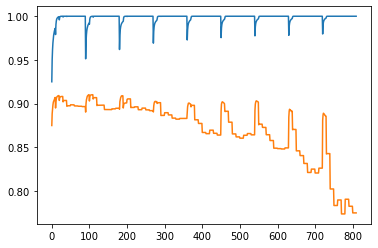

In [96]:
plt.plot(df_results_xg_hp['mean_train_score'])
plt.plot(df_results_xg_hp['mean_test_score'])

- After tuning both model there is increment in r2_score for random forest regressor and decrement in the rmse for random forest regressor,so the random forest regressor is the best model for predicting concrete compressive strength with paramters of "'criterion': 'poisson', 'max_depth': 18, 'n_estimators': 100"

### Conclusion

In [100]:
# creating data frame using all model scores
scores = {'models':['Linear Regression','Lasso Regression','Ridge Regression','Descision Tree Regressor','SVM Regressor','Random Forest Regressor','Xg Boost Regressor','Random Forest Hyperparameter','Xg Boost Hyperparameter'],
    'mse':[mse_lr,mse_lasso,mse_ridge,mse_dt,mse_svm,mse_rf,mse_xg,mse_rf_hp,mse_xg_hp],
'rmse':[rmse_lr,rmse_lasso,rmse_ridge,rmse_dt,rmse_svm,rmse_rf,rmse_xg,rmse_rf_hp,rmse_xg_hp],
'r2_train_score':[r2_train_lr,r2_train_lasso,r2_train_ridge,r2_train_dt,r2_train_svm,r2_train_rf,r2_train_xg,r2_train_rf_hp,r2_train_xg_hp],
'r2_test_score':[r2_test_lr,r2_test_lasso,r2_test_ridge,r2_test_dt,r2_test_svm,r2_test_rf,r2_test_xg,r2_test_rf_hp,r2_test_xg_hp]}


In [101]:
Scores = pd.DataFrame(scores)

In [102]:
Scores

,models,mse,rmse,r2_train_score,r2_test_score
0,Linear Regression,103.854130,10.190885,0.657727,0.614083
1,Lasso Regression,205.312063,14.328715,0.262930,0.237069
2,Ridge Regression,105.493340,10.270995,0.655295,0.607991
3,Descision Tree Regressor,53.644347,7.324230,0.999834,0.800660
4,SVM Regressor,125.356724,11.196282,0.623228,0.534180
5,Random Forest Regressor,23.296660,4.826661,0.985305,0.913431
6,Xg Boost Regressor,23.892098,4.887954,0.999255,0.911218
7,Random Forest Hyperparameter,22.809451,4.775924,0.985653,0.915241
8,Xg Boost Hyperparameter,25.586499,5.058310,0.989336,0.904922


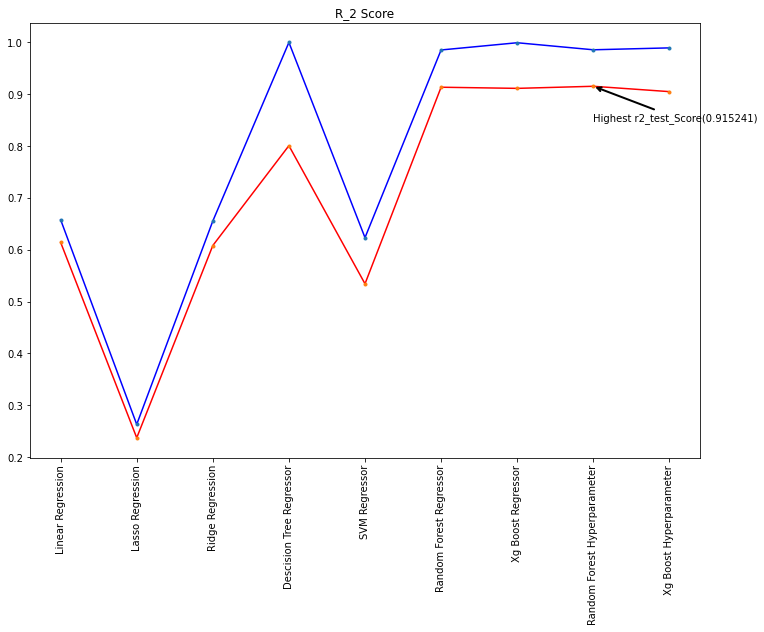

In [163]:
# plotting r2 train score and r2 test score for different models 
model_names = ['Linear Regression','Lasso Regression','Ridge Regression','Descision Tree Regressor','SVM Regressor','Random Forest Regressor','Xg Boost Regressor','Random Forest Hyperparameter','Xg Boost Hyperparameter']
plt.figure(figsize=(12,8))
plt.plot(Scores['r2_train_score'],'b')
plt.plot(Scores['r2_train_score'],'.')
plt.plot(Scores['r2_test_score'],'r')
plt.plot(Scores['r2_test_score'],'.')
plt.annotate(text = 'Highest r2_test_Score(0.915241)',xy = (7,0.915241),xytext=(7, 0.85),arrowprops=dict(arrowstyle="->",linewidth=2,facecolor='black'))
plt.xticks([0,1,2,3,4,5,6,7,8],model_names,rotation='vertical')
plt.title('R_2 Score')
plt.xticks(rotation = 90)
plt.show()

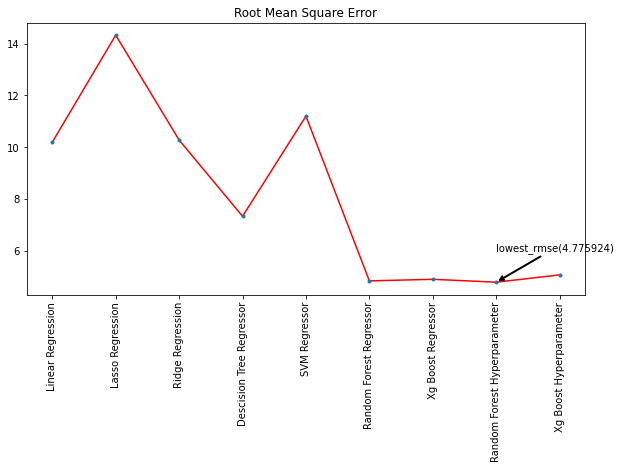

In [164]:
# plotting rmse for all models
model_names = ['Linear Regression','Lasso Regression','Ridge Regression','Descision Tree Regressor','SVM Regressor','Random Forest Regressor','Xg Boost Regressor','Random Forest Hyperparameter','Xg Boost Hyperparameter']
plt.figure(figsize=(10,5))
plt.plot(Scores['rmse'],'r')
plt.plot(Scores['rmse'],'.')
plt.annotate(text = 'lowest_rmse(4.775924)',xy = (7,4.775924),xytext=(7, 6),arrowprops=dict(arrowstyle="->",linewidth=2,facecolor='black'))
plt.xticks([0,1,2,3,4,5,6,7,8],model_names,rotation='vertical')
plt.xticks(rotation = 90)
plt.title('Root Mean Square Error')
plt.show()

#### Conclusion:
- The main problem statement of this dataset is predicting the concrete compressive strength by testing various models and selecting best from those models.
- For selecting the best model(regression) the main criteria is lowest root mean square error and high r2 score. so, after running differenrt models like linear regreession,lasso regression,ridge regression,decision tree,svm regressor,random forest,xg boost the random forest regressor and xg boost regressor giving best results based on the criteria.
- For this both model after tuning various parameters like n_estimators, max_depth,criterion,learning rate there is decrement in random forest rmse score and increment in r2score(check above dataframe and two plots for clear understanding).
- The final conclusion is Random forest regressor is best model for predicting concrete compresive strength with paramters like criterion is 'poisson', max_depth is '18', n_estimators is '100'.

#### References:
- Data source (https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)
- Practical implementation of outlier detection in python (https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce)
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition(https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

    
    
